<style>
    .my-background {
        background-color: #F4B9B2; /* Specify your desired color */
        padding:10px;
        color: #000000;
        border-radius: 10px; /* Adjust the radius as needed */
    
        
    }
</style>

<div class="my-background">
    <h1>Beyond Scoreboards: Cricket Data Analysis and Interpretability of ‘Player of the Match’ Awards</h1>
    <!-- Add your content here -->
</div>

<style>
    .my-background {
        background-color: #7DBBC3; /* Specify your desired color */
        padding: 10px;
        color: #000000;
        border-radius: 10px; /* Adjust the radius as needed */
    
        
    }
</style>

<div class="my-background">
    <h1>by Vidhi Bhatt (bvidhi) and Prathamesh Joshi (prathuj)</h1>
    <!-- Add your content here -->
</div>

<style>
    .my-background {
        background-color: #bfc211; /* Specify your desired color */
        padding: 10px;
        color: #000000;
        border-radius: 10px; /* Adjust the radius as needed */
    
        
    }
</style>

<div class="my-background">
    <h1>Data Description</h1>
    <!-- Add your content here -->
</div>

<style>
    .my-background {
        background-color: #bfc211; /* Specify your desired color */
        padding: 10px;
        color: #000000;
        border-radius: 10px; /* Adjust the radius as needed */
    
        
    }
</style>

<div class="my-background">
    <h2>Primary Data</h2>
    <!-- Add your content here -->
</div>

Cricket is one of the most popular sports in South Asian Countries like India, Pakistan, Bangladesh and Afghanistan. It is also globally cherished in countries like Australia, New Zealand, England, West Indies etc.

From the iconic Ashes rivalry to the thrilling World Cups, cricket unites nations, celebrating moments of triumph and showcasing talent across diverse cricketing landscapes.

Data taken from https://www.kaggle.com/datasets/mahendran1/icc-cricket contains ODI, Test and T20 formats scores for each player up till 2019.

**Cricket can broadly classified into two skills: Batting and Bowling**

**Batting** : In cricket, batting is the art of skillfully wielding the bat to score runs, showcasing a player's technique, precision, and timing, vital for accumulating runs for their team's total.

Features: Number of played Matches, Innings, Nunber of NotOut's, Number of runs scored, Highest Score, Total number of 100's, Total number of 50's


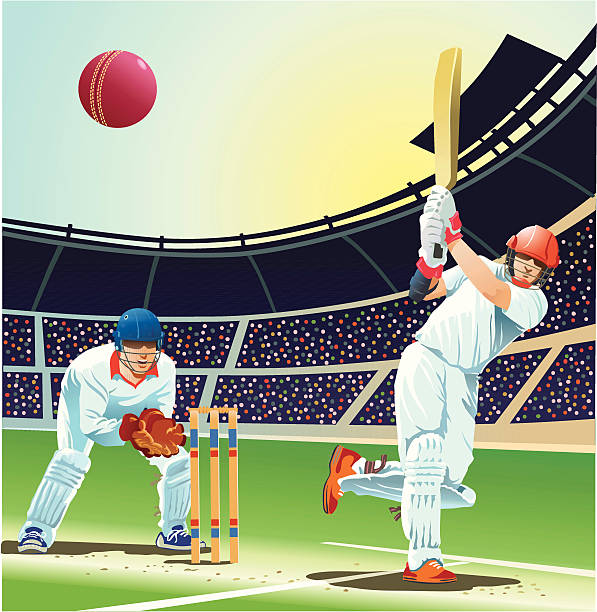

**Bowling** : Bowling involves strategic delivery of the ball, employing various techniques and speeds, aiming to outwit the batsman and dismiss them, showcasing precision, variation, and control in line and length.

Features: Number of Balls, Number of Runs scores by batsman on them, Number of Wickets scored

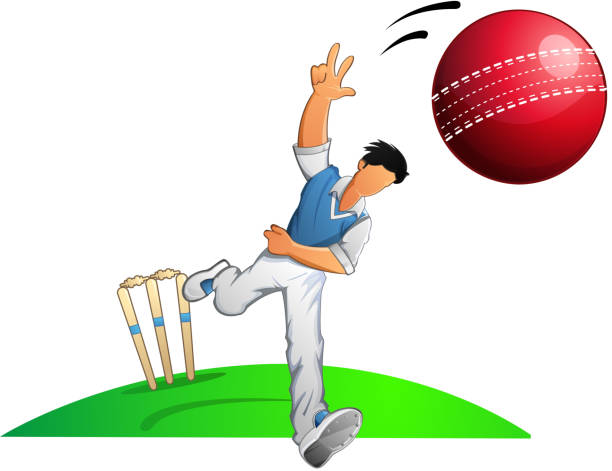

In [1]:
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import matplotlib.cm as cm 
import seaborn as sns
import geopandas as gpd

from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import statsmodels.formula.api as smf

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.inspection import permutation_importance
import shap

import warnings
warnings.filterwarnings('ignore')

<style>
    .my-background {
        background-color: #DC965A; /* Specify your desired color */
        padding: 10px;
        color: #000000;
        border-radius: 10px; /* Adjust the radius as needed */
    
        
    }
</style>

<div class="my-background">
    <h1>Data Preprocessing</h1>
    <!-- Add your content here -->
</div>


<style>
    .my-background {
        background-color: #DC965A; /* Specify your desired color */
        padding: 10px;
        color: #000000;
        border-radius: 10px; /* Adjust the radius as needed */
    
        
    }
</style>

<div class="my-background">
    <h2>Data Cleaning</h2>
    <!-- Add your content here -->
</div>

In [2]:
# # in colab
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# bat_odi = '/content/drive/MyDrive/SI 618 Project/Batting_ODI.csv'
# bat_t20 = '/content/drive/MyDrive/SI 618 Project/Batting_t20.csv'
# bat_test = '/content/drive/MyDrive/SI 618 Project/Batting_test.csv'
# bowl_odi = '/content/drive/MyDrive/SI 618 Project/Bowling_ODI.csv'
# bowl_t20 = '/content/drive/MyDrive/SI 618 Project/Bowling_t20.csv'
# bowl_test = '/content/drive/MyDrive/SI 618 Project/Bowling_test.csv'

# bat_odi = pd.read_csv(bat_odi).drop(columns=["Unnamed: 0"])
# bat_t20 = pd.read_csv(bat_t20).drop(columns=["Unnamed: 0"])
# bat_test = pd.read_csv(bat_test).drop(columns=["Unnamed: 0"])
# bowl_odi = pd.read_csv(bowl_odi).drop(columns=["Unnamed: 0"])
# bowl_t20 = pd.read_csv(bowl_t20).drop(columns=["Unnamed: 0"])
# bowl_test = pd.read_csv(bowl_test).drop(columns=["Unnamed: 0"])
# team_acr = pd.read_csv("/content/drive/MyDrive/SI 618 Project/Team_name_acronym.csv")

In [4]:
bat_odi = pd.read_csv("Batting_ODI.csv")
bat_t20 = pd.read_csv("Batting_t20.csv")
bat_test = pd.read_csv("Batting_test.csv")
bowl_odi = pd.read_csv("Bowling_ODI.csv")
bowl_t20 = pd.read_csv("Bowling_t20.csv")
bowl_test = pd.read_csv("Bowling_test.csv")

team_acr = pd.read_csv("Team_name_acronym.csv")

**Steps followed for Data cleaning**
1. Players with exact same name
    1. Players were marked according to their seniority
    1. For a few records players with better were kept while their duplicates were dropped
2. Cleaning Batting and Bowling data
    1. Player name was split into First Name, Last Name and Team Name
    2. A file for team name acronymn was constructed manually to match the team
    3. Duplicate records in the files were dropped
    3. For a player in 3 formats of data, the Span was considered to be least of Start year and maximum of End year.
    4. Numerical score columns were summed up and grouped by Player Information

In [5]:
text_to_remove = ['Asia', 'Afr', 'ICC', '/', 'XI', 'World']
team_acr

Acronym       Country
0    INDIA         India
1      IND         India
2       SL     Sri Lanka
3       SA  South Africa
4      AUS     Australia
5      BAN    Bangladesh
6    BDESH    Bangladesh
7      PAK      Pakistan
8       WI   West Indies
9       NZ   New Zealand
10     AFG   Afghanistan
11     IRE       Ireland
12     ZIM      Zimbabwe
13     ENG       England

<style>
    .my-background {
        background-color: #DC965A; /* Specify your desired color */
        padding: 10px;
        color: #000000;
        border-radius: 10px; /* Adjust the radius as needed */
    
        
    }
</style>

<div class="my-background">
    <h3>Batting data with duplicate Player Names</h3>
    <!-- Add your content here -->
</div>

In [6]:
def print_table(df, name):
    return df[df["Player"] == name]

In [7]:
print_table(bat_test, "JP Duminy (SA)")

Unnamed: 0          Player       Span  Mat Inns  NO  Runs   HS    Ave  \
293           43  JP Duminy (SA)  2008-2017   46   74  10  2103  166  32.85   
2306           6  JP Duminy (SA)  1927-1929    3    6   0    30   12   5.00   

     100 50  0  Unnamed: 11  
293    6  8  9          NaN  
2306   0  0  1          NaN

In [8]:
print_table(bat_odi, "Raqibul Hasan (BDESH)")

Unnamed: 0                 Player       Span  Mat Inns NO  Runs  HS  \
317           17  Raqibul Hasan (BDESH)  2008-2011   55   54  7  1308  89   
1949          49  Raqibul Hasan (BDESH)  1986-1986    2    2  0    17  12   

        Ave    BF     SR 100 50  0  Unnamed: 13  
317   27.82  2133  61.32   0  8  6          NaN  
1949   8.50    65  26.15   0  0  0          NaN

In [9]:
print_table(bat_test, "D Pretorius (SA)")

Unnamed: 0            Player       Span  Mat Inns NO Runs  HS   Ave 100  \
2199          49  D Pretorius (SA)  2019-2019    1    2  0   40  33  20.0   0   
2433          33  D Pretorius (SA)  2002-2003    4    4  1   22   9  7.33   0   

     50  0  Unnamed: 11  
2199  0  0          NaN  
2433  0  1          NaN

In [10]:
print_table(bat_t20, "Aminul Islam (BDESH)")

Unnamed: 0                Player       Span  Mat Inns NO Runs HS    Ave  \
1261          11  Aminul Islam (BDESH)  2019-2019    4    3  2   14  9  14.00   

      BF     SR 100 50  0 4s 6s  Unnamed: 15  
1261  14  100.0   0  0  0  2  0          NaN

In [11]:
bat_test = bat_test[~((bat_test['Player'] == 'JP Duminy (SA)') & (bat_test['Span'] == '1927-1929'))]
bat_odi = bat_odi[~((bat_odi['Player'] == 'Raqibul Hasan (BDESH)') & (bat_odi['Span'] == '1986-1986'))]
bat_test = bat_test[~((bat_test['Player'] == 'D Pretorius (SA)') & (bat_test['Span'] == '2002-2003'))]
bat_t20 = bat_t20[~((bat_t20['Player'] == 'Aminul Islam (BDESH)') & (bat_t20['Span'] == '2019-2019'))]

<style>
    .my-background {
        background-color: #DC965A; /* Specify your desired color */
        padding: 10px;
        color: #000000;
        border-radius: 10px; /* Adjust the radius as needed */
    
        
    }
</style>

<div class="my-background">
    <h3>Cleaning Batting Data</h3>
    <!-- Add your content here -->
</div>

In [12]:
columns_1 = ['Player', 'Player_FN', 'Player_LN', 'Team', 'Span', 'Mat',
             'Inns','NO', 'Runs', 'HS', '100', '50', '0', '4s', '6s', 
             'Mark', 'End','Start']
col_hyphen = ['Inns', 'NO', 'Runs', 'HS', '100', '50', '0', '4s', '6s']
cols_int = ['Mat', 'Inns', 'NO', 'Runs', 'HS', '100', '50', '0', '4s', '6s']
columns_2 = ['Mat', 'Inns', 'NO', 'Runs', '100', '50', '0', '4s', '6s']

def clean_bat(df, has_boundaries):
    df.reset_index(drop=True, inplace=True)
    df['Player_FN'] = df['Player'].str.split('(').str[0].str.split(' '
                                                                   ).str[0]
    df['Player_LN'] = df['Player'].str.split('(').str[0].str.split(' '
                                                                   ).str[-2]
    df['Team'] = df['Player'].str.split('(').str[1].str.split(')'
                                                              ).str[0]

    for i in text_to_remove:
        df['Team'] = df['Team'].str.replace(i, '')

    for i in range(len(df)):
        if df['Team'][i] in team_acr['Acronym'].values:
            df['Team'][i] = team_acr[team_acr['Acronym'] == df['Team'
                                                               ][i]]['Country'].values[0]
        else:
            df['Team'][i] = 'Other'

    df['key'] = df['Player_FN'] + '_' + df['Player_LN'] + '_' \
        + df['Team'] + '_' + df['Span']
    df['Player'] = df['Player_FN'] + ' ' + df['Player_LN'] + ' (' \
        + df['Team'] + ')'

    if has_boundaries== False:
        df[['4s', '6s']] = 0
    #split Span column into two columns
    df[['Start', 'End']] = df.Span.str.split("-", 
                                             expand=True).astype(int)
    df['Mark'] = df.groupby('Player')['Start'].transform(lambda x: 
                                                         x.rank().astype(int))
    df = df[columns_1]
    df.fillna(0, inplace=True)
    df[col_hyphen] = df[col_hyphen].replace('-', 0)
    df[['HS', 'HS_2']] = df.HS.str.split("*", expand=True)
    df.drop('HS_2', axis=1, inplace=True)
    df.fillna(0, inplace=True)
    df.drop(['Span'], axis=1, inplace=True)
    df[cols_int] = df[cols_int].astype(int)
    return df

In [13]:
bat_odi_clean = clean_bat(bat_odi, False)
bat_t20_clean = clean_bat(bat_t20, True)
bat_test_clean = clean_bat(bat_test, False)

# concat all batting dataframes
bat = pd.concat([bat_odi_clean, bat_t20_clean, bat_test_clean], 
                axis=0)

# group by Player and find sum of all columns
bat = bat.groupby(['Player_FN', 'Player_LN', 'Team', 'Mark']).agg({
   'Player': 'first', 'Start': 'min', 'End': 'max', 'HS': 'max',
   **{col: 'sum' for col in columns_2}}).reset_index()
bat['Years_Played'] = bat['End'] - bat['Start'] + 1
bat.sort_values('Years_Played', ascending=False, inplace=True)
bat = bat[bat['Player'] != 'S Ali (India)']

bat.head(4)

Player_FN Player_LN         Team  Mark                    Player  Start  \
4782         W    Rhodes      England     1        W Rhodes (England)   1899   
1065        DB     Close      England     1        DB Close (England)   1949   
1415        FE   Woolley      England     1      FE Woolley (England)   1909   
1546        GA   Headley  West Indies     1  GA Headley (West Indies)   1930   

       End   HS  Mat  Inns  NO  Runs  100  50   0  4s  6s  Years_Played  
4782  1930  179   58    98  21  2325    2  11   6   0   0            32  
1065  1976   70   25    40   2   936    0   4   3   0   0            28  
1415  1934  154   64    98   7  3283    5  23  13   0   0            26  
1546  1954  270   22    40   4  2190   10   5   2   0   0            25

This list matches with the Longest careers - Records for Test Matches given at

 https://www.espncricinfo.com/records/longest-careers-283451

In [14]:
dup_1 = bat[bat.duplicated(subset=['Player_FN', 'Player_LN'], 
                           keep=False)].sort_values('Player_FN')
dup_1.head(4)

Player_FN Player_LN         Team  Mark                    Player  Start  \
93          A      Ward      England     1          A Ward (England)   1893   
94          A      Ward      England     2          A Ward (England)   1969   
126        AC   Cummins  West Indies     1  AC Cummins (West Indies)   1993   
125        AC   Cummins        Other     1        AC Cummins (Other)   1991   

      End   HS  Mat  Inns  NO  Runs  100  50  0  4s  6s  Years_Played  
93   1895  117    7    13   0   487    1   3  1   0   0             3  
94   1976   21    5     6   1    40    0   0  4   0   0             8  
126  1994   50    5     6   1    98    0   1  1   0   0             2  
125  2007   44   76    49  13   486    0   0  4   0   0            17

In [15]:
dup_2 = bat[bat.duplicated(subset=['Player_FN', 'Player_LN', 'Team'], 
                           keep=False)].sort_values('Player_FN')
dup_2.head(4)

Player_FN Player_LN     Team  Mark            Player  Start   End   HS  \
93          A      Ward  England     1  A Ward (England)   1893  1895  117   
94          A      Ward  England     2  A Ward (England)   1969  1976   21   
198        AG     Singh    India     1  AG Singh (India)   1955  1964  100   
199        AG     Singh    India     2  AG Singh (India)   1960  1961   35   

     Mat  Inns  NO  Runs  100  50  0  4s  6s  Years_Played  
93     7    13   0   487    1   3  1   0   0             3  
94     5     6   1    40    0   0  4   0   0             8  
198   14    20   5   422    1   2  4   0   0            10  
199    4     6   0    92    0   0  0   0   0             2

<style>
    .my-background {
        background-color: #DC965A; /* Specify your desired color */
        padding: 10px;
        color: #000000;
        border-radius: 10px; /* Adjust the radius as needed */
    
        
    }
</style>

<div class="my-background">
    <h3>Bowling data with duplicate Player Names</h3>
    <!-- Add your content here -->
</div>

In [16]:
print_table(bowl_t20, "Aminul Islam (BDESH)")
bowl_t20 = bowl_t20[~((bowl_t20['Player'] == 'Aminul Islam (BDESH)') & 
                      (bowl_t20['Span'] == '2019-2019'))]

In [17]:
print_table(bowl_odi, "Raqibul Hasan (BDESH)")
bowl_odi = bowl_odi[~((bowl_odi['Player'] == 'Raqibul Hasan (BDESH)') & 
                      (bowl_odi['Span'] == '1986-1986'))]

In [18]:
print_table(bowl_odi, "RP Singh (INDIA)")
bowl_odi = bowl_odi[~((bowl_odi['Player'] == 'RP Singh (INDIA)') & 
                      (bowl_odi['Span'] == '1986-1986'))]

In [19]:
print_table(bowl_test, "Z Khan (INDIA)").head(4)

Unnamed: 0          Player       Span  Mat  Inns  Balls   Runs  Wkts  \
28           28  Z Khan (INDIA)  2000-2014   92   165  18785  10247   311   
78           28  Z Khan (INDIA)  2000-2014   92   165  18785  10247   311   
128          28  Z Khan (INDIA)  2000-2014   92   165  18785  10247   311   
178          28  Z Khan (INDIA)  2000-2014   92   165  18785  10247   311   

      BBI     BBM    Ave  Econ    SR   5  10  Unnamed: 14  
28   7/87  10/149  32.94  3.27  60.4  11   1          NaN  
78   7/87  10/149  32.94  3.27  60.4  11   1          NaN  
128  7/87  10/149  32.94  3.27  60.4  11   1          NaN  
178  7/87  10/149  32.94  3.27  60.4  11   1          NaN

Duplicate values in a dataset were dropped

<style>
    .my-background {
        background-color: #DC965A; /* Specify your desired color */
        padding: 10px;
        color: #000000;
        border-radius: 10px; /* Adjust the radius as needed */
    
        
    }
</style>

<div class="my-background">
    <h3>Cleaning Bowling Data</h3>
    <!-- Add your content here -->
</div>

In [20]:
columns_4 = ['Player', 'Player_FN', 'Player_LN', 'Team', 'Inns', 
             'Balls', 'Runs', 'Wkts', 'Span', 'Mark', 'End', 'Start']
columns_3 = ['Inns', 'Balls', 'Runs', 'Wkts', 'Span']
cols_int = ['Inns', 'Balls', 'Runs', 'Wkts']


def clean_bowl(df, over_to_ball):
    df.reset_index(drop=True, inplace=True)
    df['Player_FN'] = df['Player'].str.split('(').str[0].str.split(' '
                                                                   ).str[0]
    df['Player_LN'] = df['Player'].str.split('(').str[0].str.split(' '
                                                                   ).str[-2]
    df['Team'] = df['Player'].str.split('(').str[1].str.split(')').str[0]

    for i in text_to_remove:
        df['Team'] = df['Team'].str.replace(i, '')

    for i in range(len(df)):
        if df['Team'][i] in team_acr['Acronym'].values:
            df['Team'][i] = team_acr[team_acr['Acronym'] == df['Team'
                                                               ][i]]['Country'].values[0]
        else:
            df['Team'][i] = 'Other'

    df['key'] = df['Player_FN'] + '_' + df['Player_LN'] + '_'\
        + df['Team'] + '_' + df['Span']
    df['Player'] = df['Player_FN'] + ' ' + df['Player_LN'] + \
        ' (' + df['Team'] + ')'

    df = df.drop_duplicates(subset=['key'])
    # split overs at the decimal point * 6 + remaining balls
    if over_to_ball == True:
        df.Overs = df.Overs.replace('-', 0.0)
        df['Overs'] = df['Overs'].astype(str)
        df['Balls'] = df.Overs.str.split('.').apply(lambda x: 
                                                    int(x[0]) * 6 + int(x[1]))
    # split Span column into two columns
    df[['Start', 'End']] = df.Span.str.split("-", 
                                             expand=True).astype(int)
    df['Mark'] = df.groupby('Player')['Start'
                                      ].transform(lambda x: x.rank().astype(int))
    df = df[columns_4]
    df.fillna(0, inplace=True)
    df[columns_3] = df[columns_3].replace('-', 0)
    # df.drop(['Span'], axis=1, inplace=True)
    df[cols_int] = df[cols_int].astype(int)
    return df

In [21]:
bowl_odi_clean = clean_bowl(bowl_odi, False)
bowl_t20_clean = clean_bowl(bowl_t20, True)
bowl_test_clean = clean_bowl(bowl_test, False)

# concat all batting dataframes
bowl = pd.concat([bowl_odi_clean, bowl_t20_clean, 
                  bowl_test_clean], 
                  axis=0)

# group by Player and find sum of all columns
bowl = bowl.groupby(['Player_FN', 'Player_LN', 'Team', 'Mark']).agg({
   'Player': 'first', 'Start': 'min', 'End': 'max',
   **{col: 'sum' for col in cols_int}}).reset_index()
bowl['Years_Played'] = bowl['End'] - bowl['Start']
bowl.sort_values('Wkts', ascending=False, inplace=True)

bowl.head()

Player_FN     Player_LN       Team  Mark                      Player  \
1844         M  Muralitharan  Sri Lanka     1  M Muralitharan (Sri Lanka)   
2930        SK         Warne  Australia     1        SK Warne (Australia)   
25           A        Kumble      India     1            A Kumble (India)   
1055        GD       McGrath  Australia     1      GD McGrath (Australia)   
3427     Wasim         Akram   Pakistan     1      Wasim Akram (Pakistan)   

      Start   End  Inns  Balls   Runs  Wkts  Years_Played  
1844   1992  2011   583  63132  30803  1347            19  
2930   1992  2007   464  51347  25536  1001            15  
25     1990  2008   501  55346  28767   956            18  
1055   1993  2007   493  42266  20656   949            14  
3427   1984  2003   532  40813  21591   916            19

In [22]:
bowl[bowl['Player_LN'] == 'Kallis']

Player_FN Player_LN          Team  Mark                    Player  Start  \
1463        JH    Kallis  South Africa     1  JH Kallis (South Africa)   1995   

       End  Inns  Balls   Runs  Wkts  Years_Played  
1463  2014   574  31258  18548   577            19

In [23]:
dup_3 = bowl[bowl.duplicated(subset=['Player_FN', 'Player_LN'], 
                             keep=False)].sort_values('Player_FN')
dup_3.shape

(50, 12)

Players with same FN and LN but different Teams

<style>
    .my-background {
        background-color: #DC965A; /* Specify your desired color */
        padding: 10px;
        color: #000000;
        border-radius: 10px; /* Adjust the radius as needed */
    
        
    }
</style>

<div class="my-background">
    <h3>Merging Batting and Bowling data</h3>
    <!-- Add your content here -->
</div>

In [24]:
print_table(bowl, "Imran Khan (Pakistan)")

Player_FN Player_LN      Team  Mark                 Player  Start   End  \
1340     Imran      Khan  Pakistan     1  Imran Khan (Pakistan)   1971  1992   

      Inns  Balls   Runs  Wkts  Years_Played  
1340   295  26919  13102   544            21

In [25]:
print_table(bowl, "P Roy (India)")

Empty DataFrame
Columns: [Player_FN, Player_LN, Team, Mark, Player, Start, End, Inns, Balls, Runs, Wkts, Years_Played]
Index: []

In [26]:
print_table(bowl, "A Ward (England)")

Empty DataFrame
Columns: [Player_FN, Player_LN, Team, Mark, Player, Start, End, Inns, Balls, Runs, Wkts, Years_Played]
Index: []

In [27]:
print_table(bowl, "RA Austin (West Indies)")

Player_FN Player_LN         Team  Mark                   Player  Start  \
2551        RA    Austin  West Indies     1  RA Austin (West Indies)   1978   

       End  Inns  Balls  Runs  Wkts  Years_Played  
2551  1978     1      6    13     0             0

Confirming that the duplicated Marked players in Batting data and Bowling data are synced correctly.

<style>
    .my-background {
        background-color: #DC965A; /* Specify your desired color */
        padding: 10px;
        color: #000000;
        border-radius: 10px; /* Adjust the radius as needed */
    
        
    }
</style>

<div class="my-background">
    <h3>Combining data sets</h3>
    <!-- Add your content here -->
</div>

In [28]:
bat.rename(columns={'Inns': 'Inns_bat', 'Runs': 'Runs_bat'}, 
           inplace=True)
bowl.rename(columns={'Inns': 'Inns_bowl', 'Runs': 'Runs_bowl'}, 
            inplace=True)

In [29]:
combined_df = pd.concat([bat, bowl], ignore_index=True)
combined_df.drop(['Years_Played'], axis=1, inplace=True)
combined_df.fillna(0, inplace=True)
combined_df.head()

Player_FN  Player_LN         Team  Mark                    Player  Start  \
0         W     Rhodes      England     1        W Rhodes (England)   1899   
1        DB      Close      England     1        DB Close (England)   1949   
2        FE    Woolley      England     1      FE Woolley (England)   1909   
3        GA    Headley  West Indies     1  GA Headley (West Indies)   1930   
4        SR  Tendulkar        India     1      SR Tendulkar (India)   1989   

    End     HS    Mat  Inns_bat    NO  Runs_bat    100     50     0   4s   6s  \
0  1930  179.0   58.0      98.0  21.0    2325.0    2.0   11.0   6.0  0.0  0.0   
1  1976   70.0   25.0      40.0   2.0     936.0    0.0    4.0   3.0  0.0  0.0   
2  1934  154.0   64.0      98.0   7.0    3283.0    5.0   23.0  13.0  0.0  0.0   
3  1954  270.0   22.0      40.0   4.0    2190.0   10.0    5.0   2.0  0.0  0.0   
4  2013  248.0  664.0     782.0  74.0   34357.0  100.0  164.0  34.0  2.0  0.0   

   Inns_bowl  Balls  Runs_bowl  Wkts  
0        0.0    0.0        0.0   0.0  
1        0.0    0.0        0.0   0.0  
2        0.0    0.0        0.0   0.0  
3        0.0    0.0        0.0   0.0  
4        0.0    0.0        0.0   0.0

In [30]:
cols_bat_bowl = ['Mat', 'Inns_bat', 'NO', 'Runs_bat', 'HS','100', '50', '0',
                 '4s', '6s', 'Inns_bowl', 'Balls', 'Runs_bowl', 'Wkts']
cricket = combined_df.groupby(['Player_FN', 'Player_LN', 'Team', 'Mark']).agg({
    'Player': 'first', 'Start': 'min', 'End': 'max',
    **{col: 'sum' for col in cols_bat_bowl}}).reset_index()

In [31]:
cricket['Years_Played'] = cricket['End'] - cricket['Start'] + 1
cricket.head()

Player_FN     Player_LN   Team  Mark                  Player  Start   End  \
0         A          Ahir  Other     1          A Ahir (Other)   2019  2019   
1         A      Ahmadhel  Other     1      A Ahmadhel (Other)   2019  2019   
2         A  Anemogiannis  Other     1  A Anemogiannis (Other)   2019  2019   
3         A       Ashokan  Other     1       A Ashokan (Other)   2019  2019   
4         A      Aspiotis  Other     1      A Aspiotis (Other)   2019  2019   

   Mat  Inns_bat   NO  Runs_bat    HS  100   50    0    4s   6s  Inns_bowl  \
0  3.0       3.0  0.0      64.0  30.0  0.0  0.0  0.0  10.0  1.0        3.0   
1  3.0       2.0  0.0      16.0  15.0  0.0  0.0  0.0   2.0  0.0        3.0   
2  1.0       0.0  0.0       0.0   0.0  0.0  0.0  0.0   0.0  0.0        0.0   
3  2.0       2.0  0.0      41.0  34.0  0.0  0.0  0.0   2.0  3.0        1.0   
4  3.0       1.0  1.0       3.0   3.0  0.0  0.0  0.0   0.0  0.0        3.0   

   Balls  Runs_bowl  Wkts  Years_Played  
0   36.0       49.0   0.0             1  
1   60.0       75.0   3.0             1  
2    0.0        0.0   0.0             1  
3   12.0       16.0   0.0             1  
4   66.0       71.0   4.0             1

In [32]:
print_table(cricket, "Imran Khan (Pakistan)")

Player_FN Player_LN      Team  Mark                 Player  Start   End  \
2043     Imran      Khan  Pakistan     1  Imran Khan (Pakistan)   1971  1992   
2044     Imran      Khan  Pakistan     2  Imran Khan (Pakistan)   2014  2019   

        Mat  Inns_bat    NO  Runs_bat     HS  100    50     0   4s   6s  \
2043  263.0     277.0  65.0    7516.0  136.0  7.0  37.0  14.0  0.0  0.0   
2044   10.0      10.0   3.0      16.0    6.0  0.0   0.0   5.0  0.0  0.0   

      Inns_bowl    Balls  Runs_bowl   Wkts  Years_Played  
2043      295.0  26919.0    13102.0  544.0            22  
2044        0.0      0.0        0.0    0.0             6

We are successful to retain records of Players with same names and Team.

In [33]:
# cricket.to_csv('cleaned_cricket.csv')


<style>
    .my-background {
        background-color: #89b505; /* Specify your desired color */
        padding: 10px;
        color: #000000;
        border-radius: 10px; /* Adjust the radius as needed */
    
        
    }
</style>

<div class="my-background">
    <h1>Data Exploration</h1>
    <!-- Add your content here -->
</div>

<style>
    .my-background {
        background-color: #89b505; /* Specify your desired color */
        padding: 10px;
        color: #000000;
        border-radius: 10px; /* Adjust the radius as needed */
    
        
    }
</style>

<div class="my-background">
    <h3>Correlation plot</h3>
    <!-- Add your content here -->
</div>

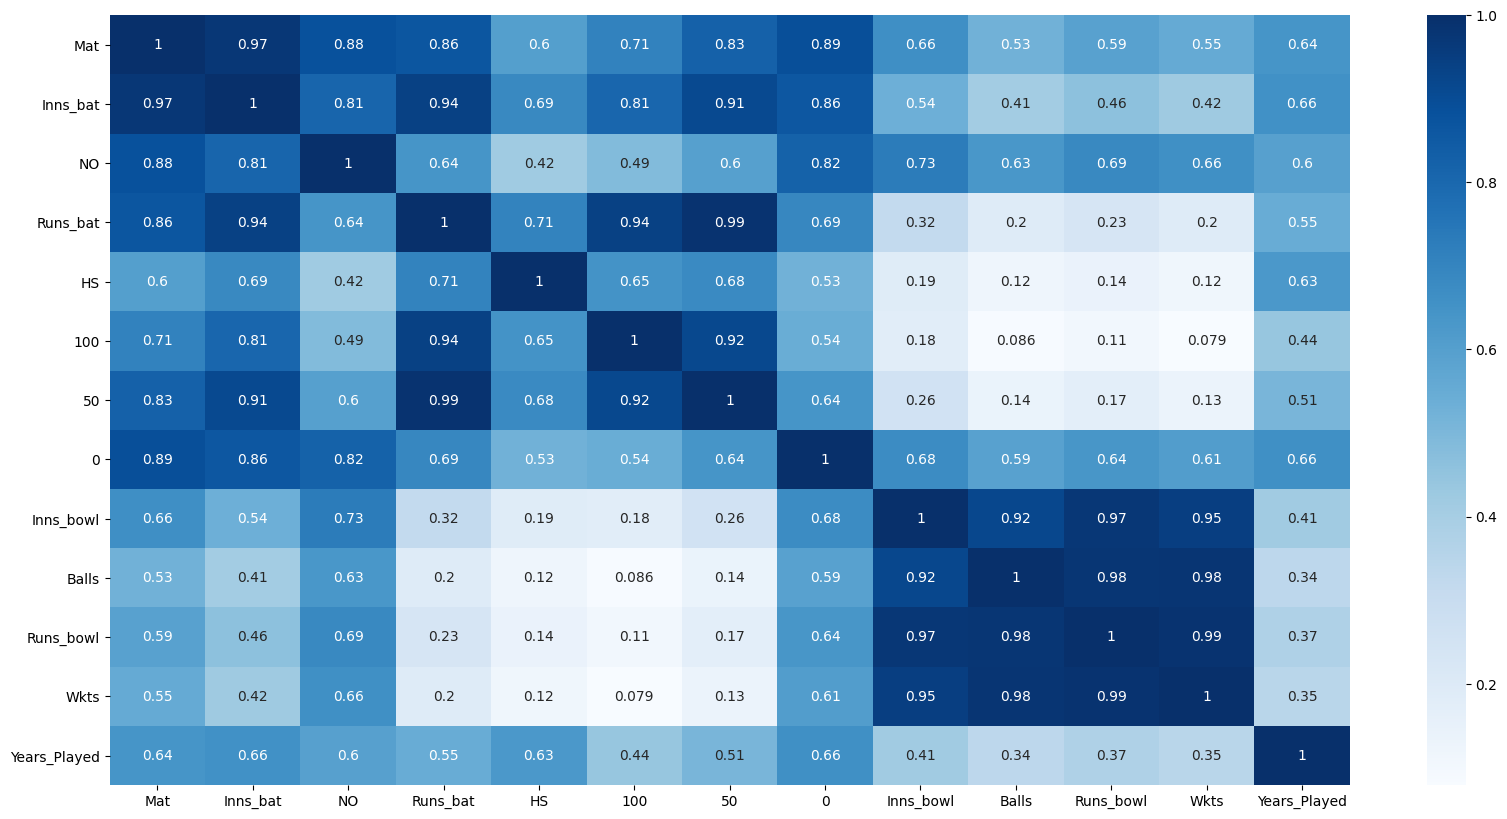

In [34]:
# take numeric columns
feature_list = ['Mat', 'Inns_bat', 'NO', 'Runs_bat', 'HS',
                '100', '50', '0', 'Inns_bowl', 'Balls', 
                'Runs_bowl', 'Wkts', 'Years_Played']

match_table = cricket[feature_list]

cricket_num = match_table.select_dtypes(include=['int64',
                                                 'float64'])

# correlation matrix for all numeric columns
corr = match_table.corr()

# plot heatmap of correlation matrix in blue
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.show()

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Observations</b><br>
💡 The correlation plot shows correlation between different batting and bowling features we constructed in the dataframe.<br>
💡 Here we can see that the batting features and bowling features correlating among themselves showing that our data contatins players that can be categorized as good batsman or good bowlers.<br>

<b>Insights</b><br>
💡 Variables like Not Out (NO) or 0 (zero runs) also show relevance to bowlers as they are moslty an indication of not being a good batsman.<br>

</div>

<style>
    .my-background {
        background-color: #89b505; /* Specify your desired color */
        padding: 10px;
        color: #000000;
        border-radius: 10px; /* Adjust the radius as needed */
    
        
    }
</style>

<div class="my-background">
    <h3>Player Analysis</h3>
    <!-- Add your content here -->
</div>

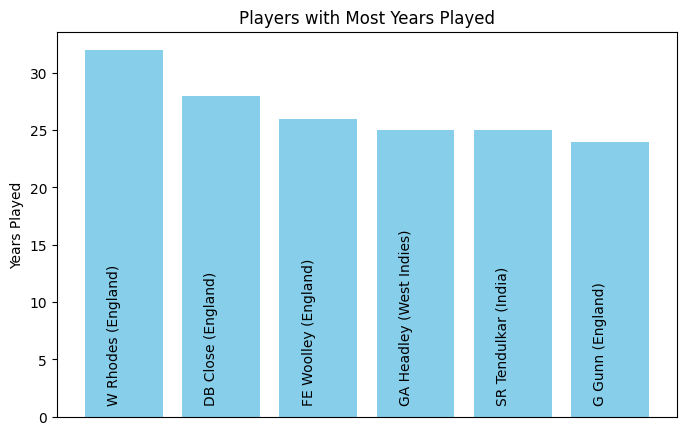

In [35]:
most_years_played = cricket.sort_values('Years_Played', 
                                        ascending=False).head(6)

# plot bar chart with player name as text in the bar. no x label
plt.figure(figsize=(8, 5))
bars = plt.bar(most_years_played.Player, 
               most_years_played.Years_Played, 
               color='skyblue')
# remove x label
plt.xticks([])
plt.ylabel('Years Played')
plt.title('Players with Most Years Played')

# Add player names on top of the bars
for bar, player in zip(bars, most_years_played.Player):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, 1,
             player, 
             ha='center', 
             va='bottom', 
             rotation=90)
    
plt.show()

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Observations</b><br>
💡 W. Rhodes, D.B. Close and F.E. Woolley from England are the top 3 cricketers with the longest career span of 32, 28 and 26 respectively.<br>
💡 Followed by G.A. Headley (West Indies), Sachin Tendulkar (India) and G. Gunn (England) with career span of 25, 25, 24 respectively.<br>

<b>Insights</b><br>
💡 W. Rhodes played cricket from later 19th to early 20th century. He was known for his left-handed batsman skills.<br>
💡 F.E. Woolley was a key player for Kent and England during the early to mid-20th century. <br>
💡 S.R. Tendulkar is known as one of the greatest batsmen in the history of the sport and during which he set numerous records and achieved remarkable success in both Test and ODI cricket.<br>
</div>

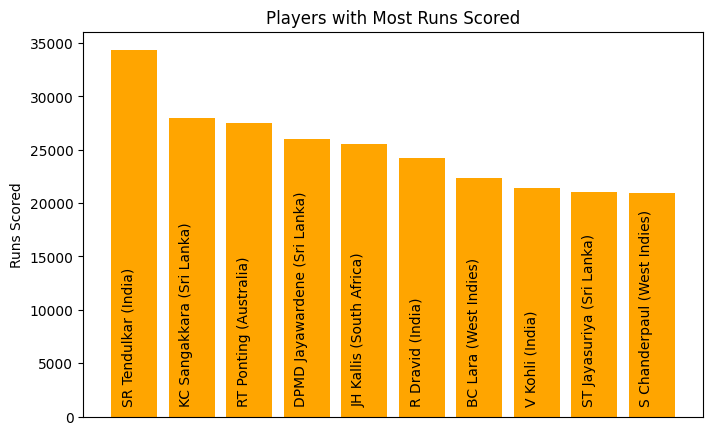

In [36]:
most_runs_bat = cricket.sort_values('Runs_bat', 
                                    ascending=False).head(10)

# plot bar chart with player name as text in the bar. no x label
plt.figure(figsize=(8, 5))
bars = plt.bar(most_runs_bat.Player, 
               most_runs_bat.Runs_bat, 
               color='orange')
# remove x label
plt.xticks([])
plt.ylabel('Runs Scored')
plt.title('Players with Most Runs Scored')

# Add player names on top of the bars
for bar, player in zip(bars, most_runs_bat.Player):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, 1000,
             player, 
             ha='center', 
             va='bottom', 
             rotation=90)
    
plt.show()

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Observations</b><br>
💡 Sachin Tendulkar stands out as the player with the highest number of runs i.e. 34357 and he is regarded as one of teh greatest batsman in the history of the sport.<br>
💡 Kumar Sangakkara follows closely and has accumulated 28016 runs and is known for his elegant left-handed batting.<br>
💡 Ricky Ponting was a former Australian captain, securing total runs of 27483.<br>
💡 Mahela Jayawardene had a successful career from 1997 to 2015 with a total 25957 runs.<br>
💡 Jacques Kallis is one of the greatest all-rounders in the history of the game and has amassed a staggering 25,534 runs during his career from 1995 to 2014.<br>
💡 Known for his solid and classical batting, Rahul Dravid played from 1996 to 2012, scoring 24,208 runs. <br>

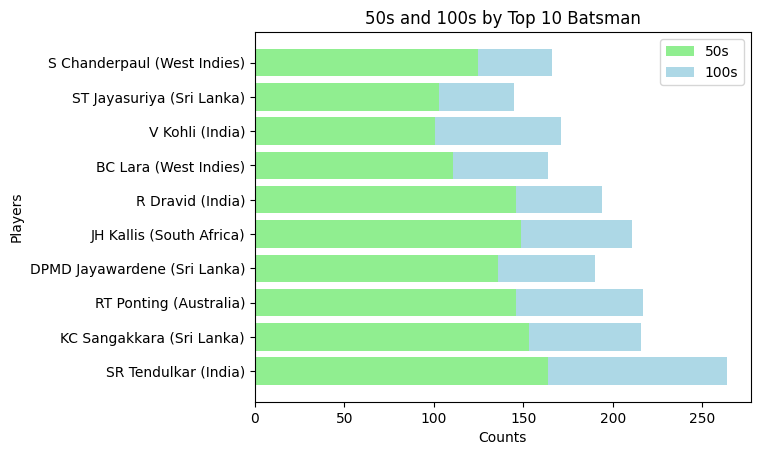

In [37]:
plt.barh(most_runs_bat['Player'], 
         most_runs_bat['50'], 
         color='lightgreen', 
         label='50s')
plt.barh(most_runs_bat['Player'], 
         most_runs_bat['100'], 
         left=most_runs_bat['50'], 
         color='lightblue', 
         label='100s')
plt.xlabel('Counts')
plt.ylabel('Players')
plt.title('50s and 100s by Top 10 Batsman')
plt.legend()
plt.show()

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Observations</b><br>
💡 It is evident from the stacked barplot that the number of 50s is greater than 100s for the players. It shows the players are good at getting the innings started and laying a foundation for it.<br>
💡 Tendulkar has a significant number of both 50s and 100s, showcasing his ability to consistently perform at a high level.<br>
💡 Lara's stacked bar plot could showcase a somewhat balance between 50s and 100s, reflecting his ability to play long innings and entertain fans with his stylish batting.<br>
💡 As of the provided data (up to 2019), Kohli might have a significant number of both 50s and 100s, highlighting his consistency and ability to convert starts into big scores.<br>
💡 Jayasuriya, known for his aggressive batting, may have a higher number of 50s compared to 100s, showcasing his explosive style at the top of the order.<br>
💡 Chanderpaul's stacked bar plot might indicate a higher number of 50s, reflecting his role as a reliable and consistent middle-order batsman.<br>

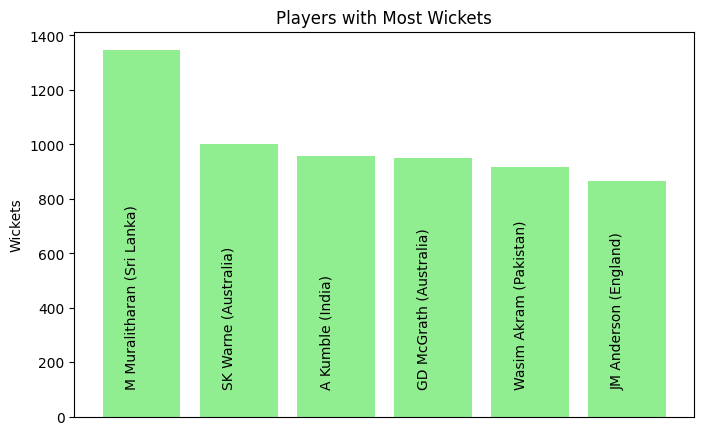

In [38]:
most_wickets = cricket.sort_values('Wkts', 
                                   ascending=False).head(6)

# players with most Wickets
plt.figure(figsize=(8, 5))
bars = plt.bar(most_wickets.Player, 
               most_wickets.Wkts, 
               color='lightgreen')
plt.xticks([])
plt.ylabel('Wickets')
plt.title('Players with Most Wickets')

# Add player names on top of the bars
for bar, player in zip(bars, most_wickets.Player):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, 100,
             player, 
             ha='center', 
             va='bottom', 
             rotation=90)

plt.show()

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Observations</b><br>
💡 Muralitharan tops the list with an impressive 1,347 wickets. He is widely regarded as one of the greatest spin bowlers in the history of cricket.<br>
💡 Warne, another legendary spin bowler, is second on the list with 1,001 wickets.<br>
💡 Kumble, an iconic Indian leg-spinner, secured 956 wickets during his career from 1990 to 2008. He was known for his accuracy and consistency, and he remains India's highest wicket-taker in Test cricket.<br>
💡 McGrath, a legendary Australian fast bowler, claimed 949 wickets.<br>
💡 Akram, one of the greatest left-arm fast bowlers, took 916 wickets. He was known for his swing, pace, and ability to perform in all formats of the game.<br>
💡 Anderson is England's all-time leading wicket-taker.<br>

<style>
    .my-background {
        background-color: #89b505; /* Specify your desired color */
        padding: 10px;
        color: #000000;
        border-radius: 10px; /* Adjust the radius as needed */
    
        
    }
</style>

<div class="my-background">
    <h3>Team Analysis</h3>
    <!-- Add your content here -->
</div>

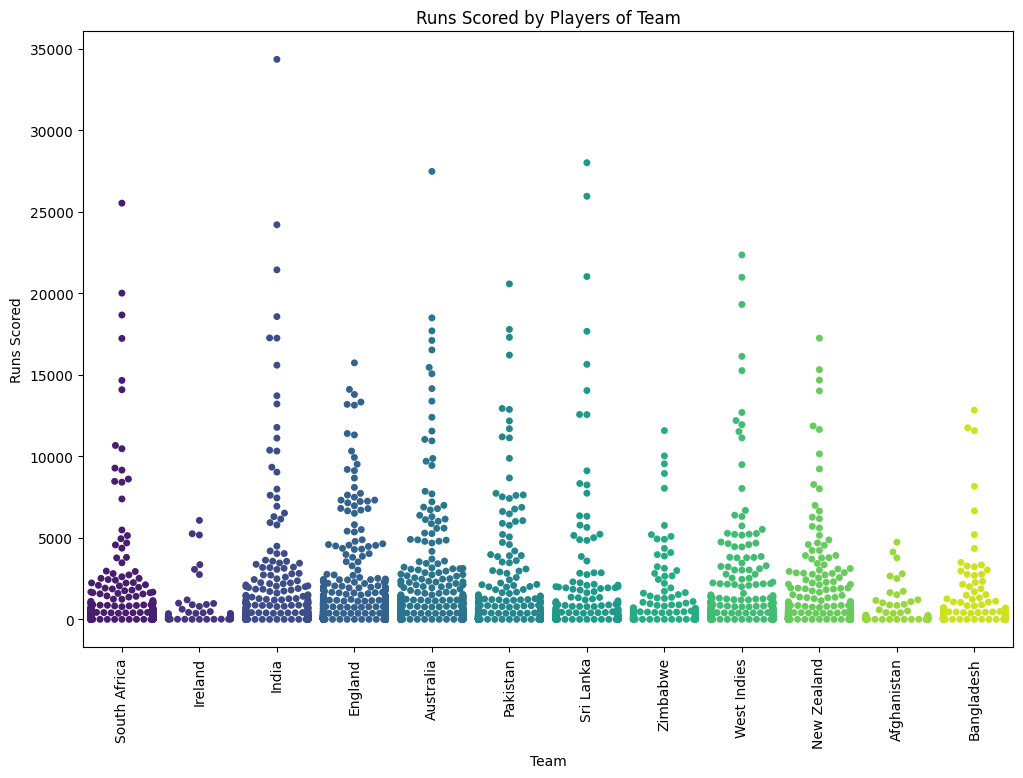

In [39]:
filtered_cricket = cricket[cricket['Team'] != 'Other']

plt.figure(figsize=(12, 8))
sns.swarmplot(x='Team', 
              y='Runs_bat', 
              data=filtered_cricket, 
              palette='viridis')
plt.title('Runs Scored by Players of Team')
plt.xlabel('Team')
plt.ylabel('Runs Scored')
plt.xticks(rotation=90)  
plt.show()

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Observations</b><br>
💡 South Africa, India, Australia and West Indies displays the most runs scored as a team.<br>
💡 Teams like India, Australia, Sri Lanka and South Africa seems to have greater values on the top range indicating having finest batman.<br>

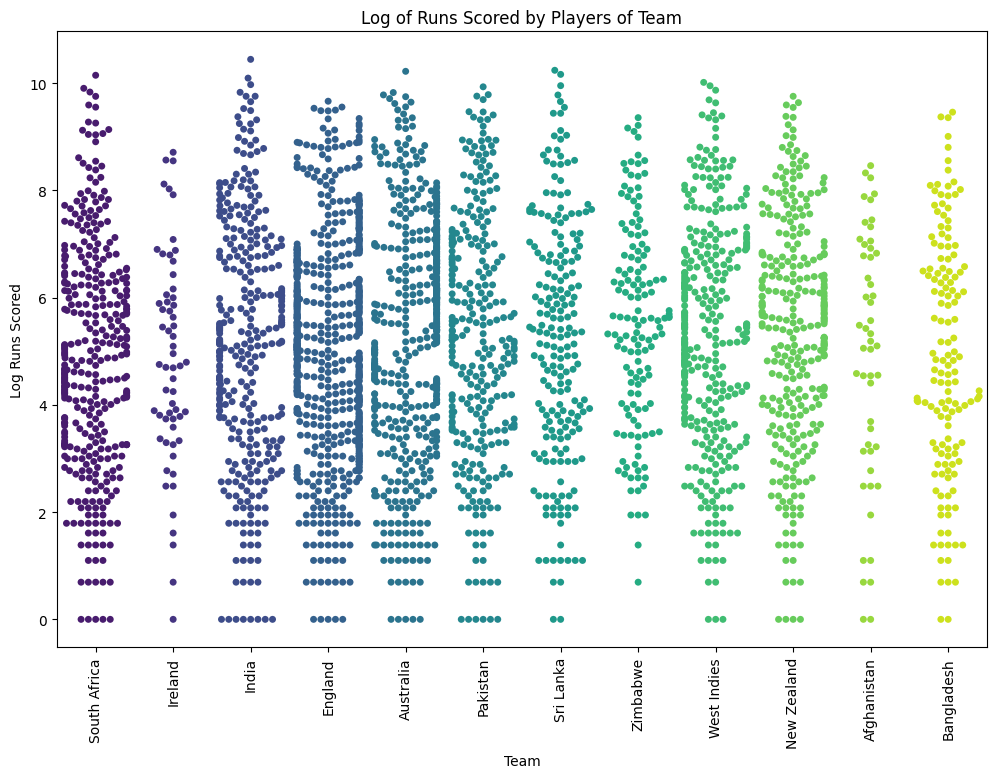

In [40]:
# take log on Runs_bat
filtered_cricket['Runs_bat_log'] = np.log(filtered_cricket['Runs_bat'])

plt.figure(figsize=(12, 8))
sns.swarmplot(x='Team', 
              y='Runs_bat_log', 
              data=filtered_cricket, 
              palette='viridis')
plt.title('Log of Runs Scored by Players of Team')
plt.xlabel('Team')
plt.ylabel('Log Runs Scored')
plt.xticks(rotation=90)  
plt.show()

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Observations</b><br>
💡 After considering the log of the runs, the plot seems more fuller for all the teams.<br>
💡 Ireland and Afghanistan has fewer data points as these teams started playing later as compared to other teams<br>

In [41]:

countries = ['India', 'Australia', 'England', 'South Africa',
             'West Indies', 'New Zealand','Pakistan','Sri Lanka', 
             'Bangladesh', 'Zimbabwe', 'Ireland', 'Afghanistan']

data_x = []

# create a loop for all the teams
for i in range(len(countries)):
    x = cricket[cricket['Team'] == countries[i]]['HS'].to_list()
    data_x.append(x)


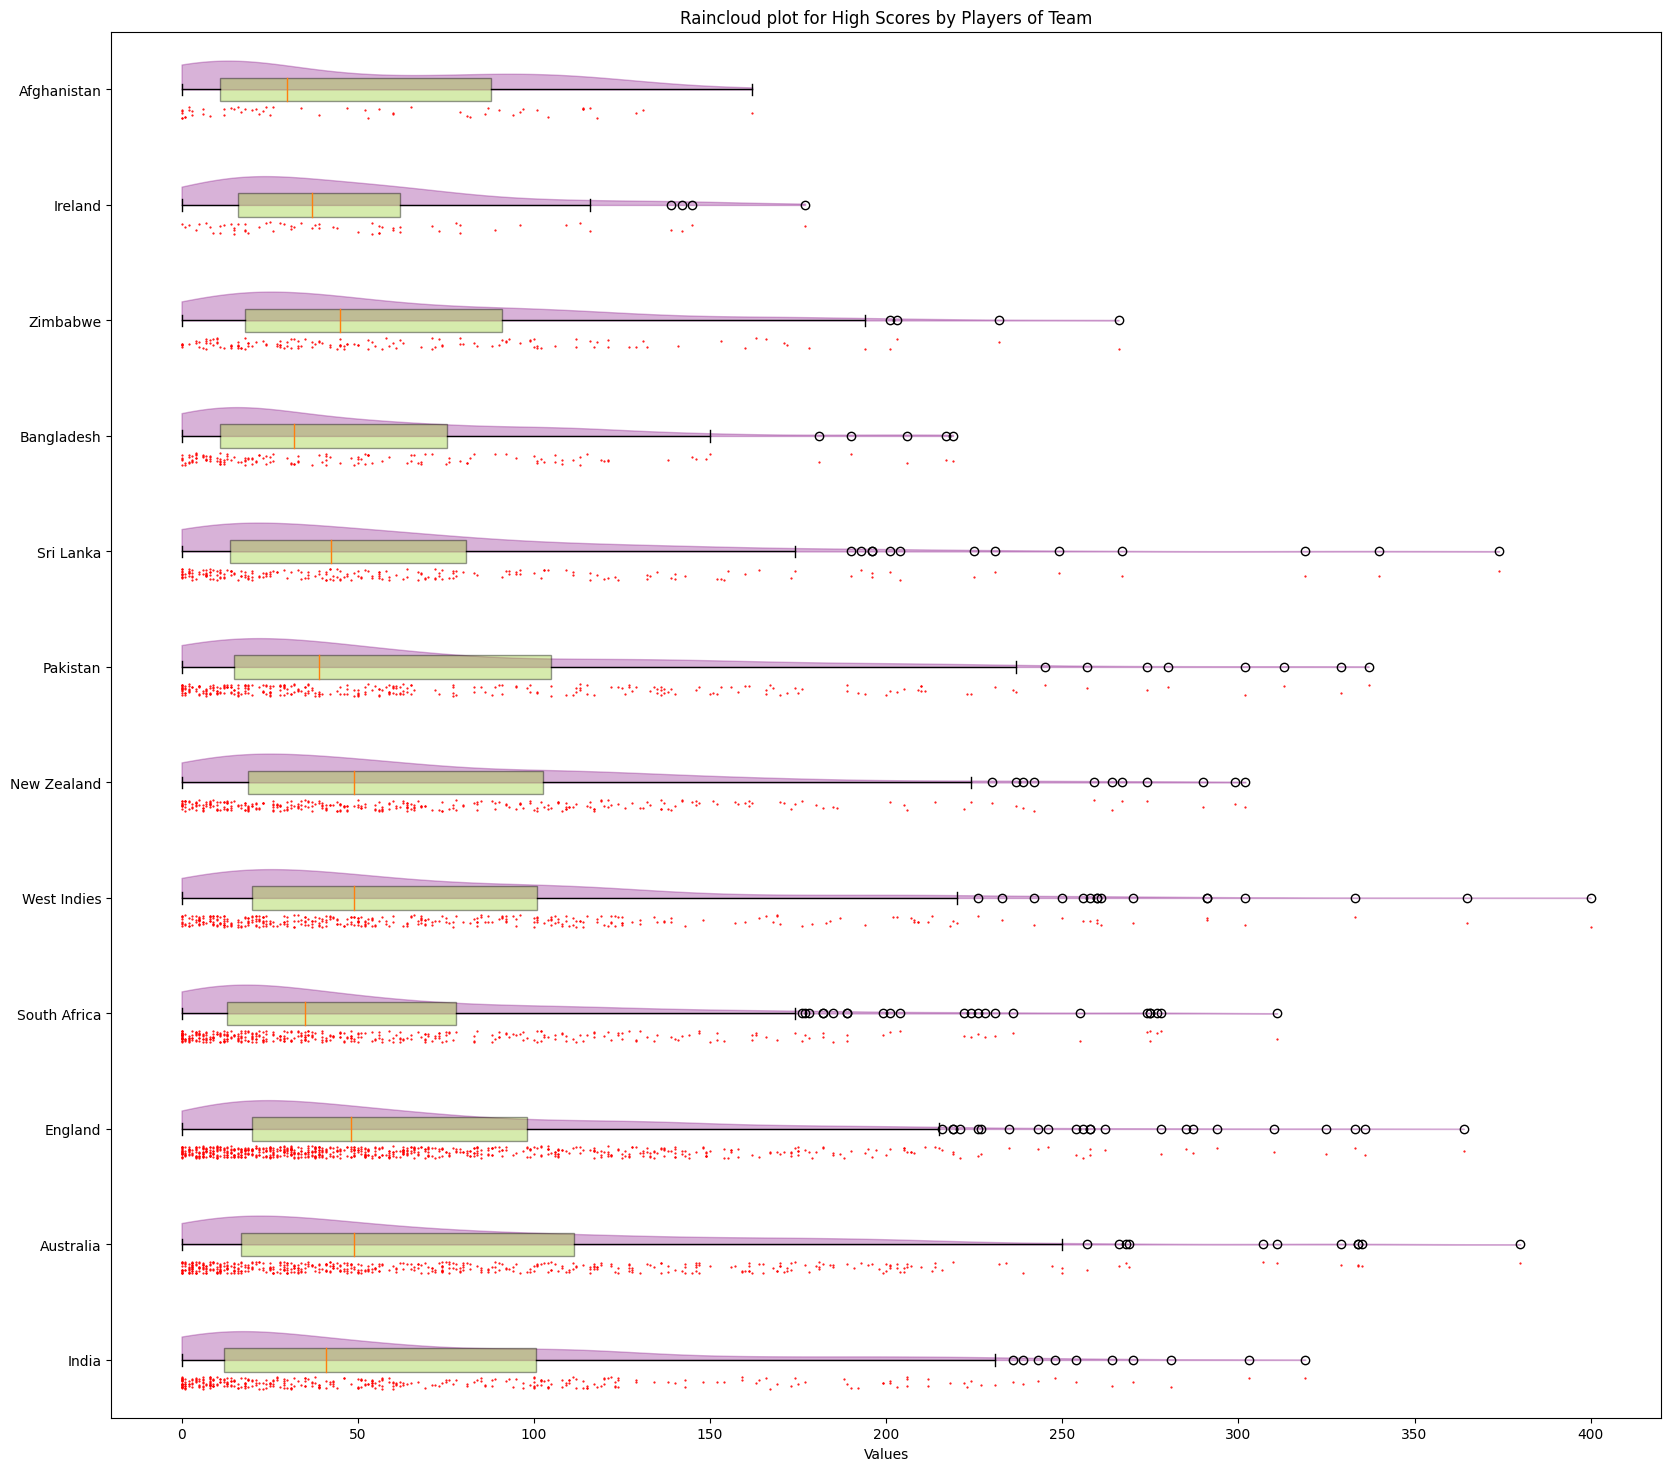

In [42]:
fig, ax = plt.subplots(figsize=(20, 18))

# Create a list of colors for the boxplots based on the number of features you have
boxplots_colors = ['yellowgreen'] * 12

# Boxplot data
bp = ax.boxplot(data_x, 
                patch_artist = True, 
                vert = False, 
                widths=0.2)

# Change to the desired color and add transparency
for patch, color in zip(bp['boxes'], boxplots_colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.4)

# Create a list of colors for the violin plots based on the number of features you have
violin_colors = ['purple'] * 12

# Violinplot data
vp = ax.violinplot(data_x, 
                   points=500, 
                   showmeans=False, 
                   showextrema=False, 
                   showmedians=False, 
                   vert=False)

for idx, b in enumerate(vp['bodies']):
    # Get the center of the plot
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    # Modify it so we only see the upper half of the violin plot
    b.get_paths()[0].vertices[:, 1] = np.clip(b.get_paths()[0].vertices[:, 1], 
                                              idx+1, 
                                              idx+2)
    # Change to the desired color
    b.set_color(violin_colors[idx])

# Create a list of colors for the scatter plots based on the number of features you have
scatter_colors = ['red'] * 12

# Scatterplot data
for idx, features in enumerate(data_x):
    # Add jitter effect so the features do not overlap on the y-axis
    y = np.full(len(features), idx + .8)
    idxs = np.arange(len(y))
    out = y.astype(float)
    out.flat[idxs] += np.random.uniform(low=-.05, 
                                        high=.05, 
                                        size=len(idxs))
    y = out
    plt.scatter(features, y, s=.3, c=scatter_colors[idx])

plt.yticks(np.arange(1, 13, 1), countries)   # Set text labels.
plt.xlabel('Values')
plt.title("Raincloud plot for High Scores by Players of Team")
plt.show()

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">
<b>Insights</b><br>
💡Some of the notable players from various cricket teams with some of the highest runs scored in their respective teams:

- India: Sachin Tendulkar, Virat Kohli, Rahul Dravid
- Australia: Ricky Ponting, Allan Border, Steve Smith
- England: Alastair Cook, Graham Gooch, Kevin Pietersen
- West Indies: Brian Lara, Shivnarine Chanderpaul, Chris Gayle
- Pakistan: Inzamam-ul-Haq, Javed Miandad, Younis Khan
- Sri Lanka: Kumar Sangakkara, Mahela Jayawardene, Sanath Jayasuriya
- South Africa: Jacques Kallis, Graeme Smith, Hashim Amla
- New Zealand: Stephen Fleming, Brendon McCullum, Ross Taylor

<style>
    .my-background {
        background-color: #89b505; /* Specify your desired color */
        padding: 10px;
        color: #000000;
        border-radius: 10px; /* Adjust the radius as needed */
    
        
    }
</style>

<div class="my-background">
    <h3>Geo plot</h3>
    <!-- Add your content here -->
</div>

In [43]:
cricket_wkts = pd.DataFrame(cricket.groupby('Team')['Wkts'
                                                    ].sum().sort_values(ascending=False))
# replace England with United Kingdom
cricket_wkts.index = cricket_wkts.index.str.replace('England', 
                                                    'United Kingdom')
# cricket_wkts

I have considered England as United Kingdom for the sake of simplicity and implementing the geo plot.

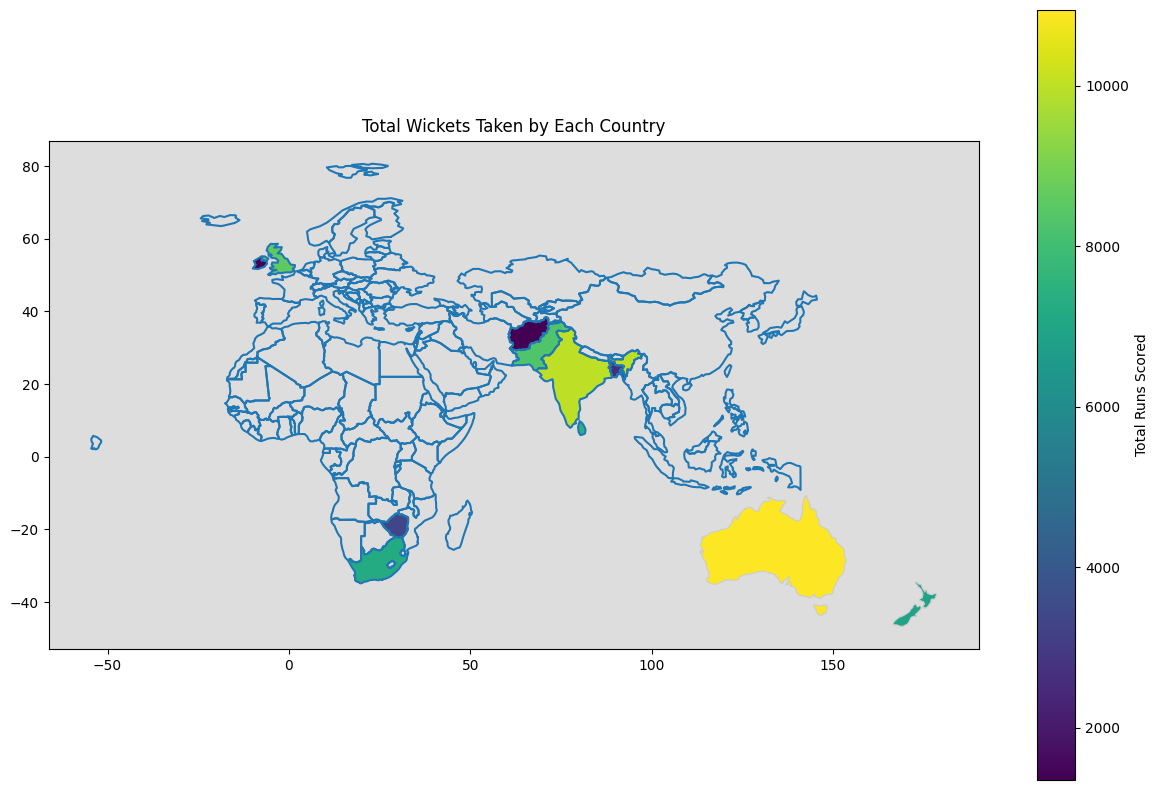

In [44]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge your cricket data with the world map based on the 'Team' column
merged_data = world.merge(cricket_wkts, 
                          how='left', 
                          left_on='name', 
                          right_on='Team')

# Plot the world map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
new_world = world[((world.continent == 'Asia') |(world.continent == 'Europe')
| (world.continent == 'Africa')) &(world.name != 'Russia')]

new_world.boundary.plot(ax=ax)  # Only plot country boundaries

# Highlight countries with cricket data
merged_data.plot(column='Wkts', 
                 cmap='viridis', 
                 linewidth=0.8, 
                 ax=ax, 
                 edgecolor='0.8', 
                 legend=True, 
                 legend_kwds={'label': "Total Runs Scored"})

# Set different colors for different countries
# You can choose a different colormap if you want more distinct colors
# cmap='viridis' is used in this example
ax.set_facecolor('#dddddd')  # Set the background color
ax.set_title('Total Wickets Taken by Each Country')

# Show the plot
plt.show()


<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Observations</b><br>
💡 The cropped world map shows distribution of wickets taken by each team or country.<br>
💡 Australia's team has secured most wickets uptill 2019, followed by India and then South Africa, Sri Lanka, New Zealand and Pakistan projecting these countries to have the best batsman.<br>
💡 Zimbabwe, Bangladesh and Afghanistan also showcases a significant number of wickets taken.<br>

<style>
    .my-background {
        background-color: #89b505; /* Specify your desired color */
        padding: 10px;
        color: #000000;
        border-radius: 10px; /* Adjust the radius as needed */
    
        
    }
</style>

<div class="my-background">
    <h3>Skill plot</h3>
    <!-- Add your content here -->
</div>

In [45]:
# largest number of matches played
most_matches = cricket.sort_values('Mat', 
                                   ascending=False).head(9)
# most_matches

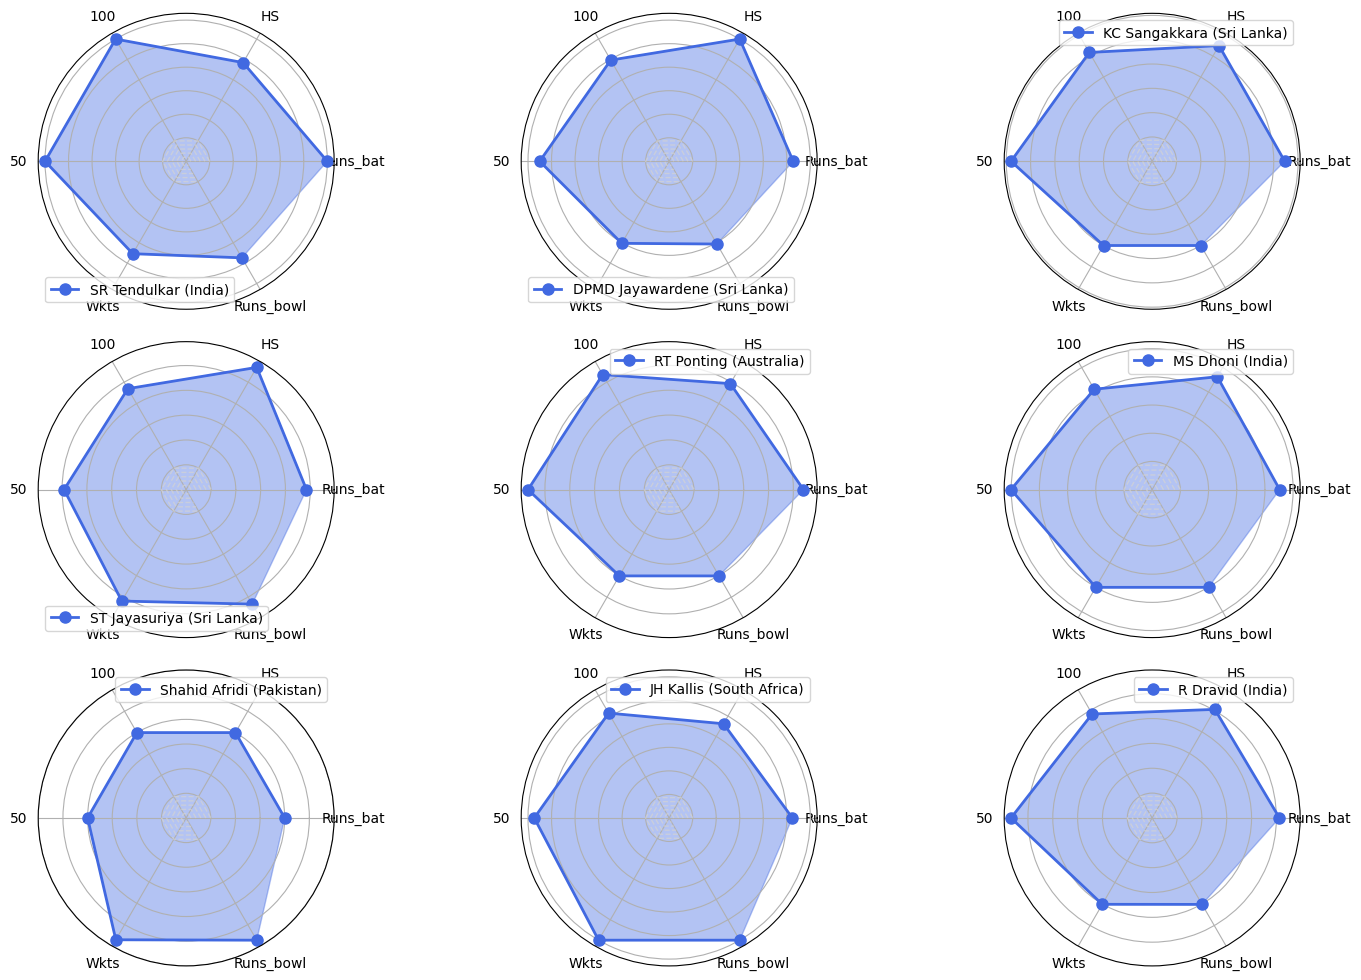

In [46]:
features = ['Runs_bat', 'HS', '100', '50', 'Wkts', 'Runs_bowl']

# Create a copy of the dataframe to avoid modifying the original data
most_matches_normalised = most_matches.copy()

# Define the desired range for normalization
desired_range = (20, 30)

# Custom normalization for each feature
for feature in features:
    max_value = most_matches[feature].max()
    min_value = most_matches[feature].min()
    most_matches_normalised[feature] = desired_range[0] + \
        (desired_range[1] - \
         desired_range[0]) * ((most_matches[feature] - min_value) / (max_value - min_value))

num_players = len(most_matches_normalised)
num_rows = 3
num_cols = 3

fig, axs = plt.subplots(num_rows, 
                        num_cols, 
                        figsize=(15, 10), 
                        subplot_kw=dict(polar=True))

# Iterate over players and create radar plots in each subplot
for i in range(min(num_players, num_rows * num_cols)):
    player = most_matches_normalised.iloc[i]['Player']
    values = most_matches_normalised.iloc[i][features]

    angles = np.linspace(0, 2 * np.pi, 
                         len(features), 
                         endpoint=False).tolist()

    row = i // num_cols
    col = i % num_cols

    # Plot concentric circles
    for r in range(1, 6):
        ax = axs[row, col]
        ax.plot(angles, 
                [r] * len(features), 
                color='lightgray', 
                linestyle='dashed', 
                linewidth=1, alpha=0.7)

    # Plot player's radar plot
    ax = axs[row, col]
    ax.plot(angles, 
            values, 
            linewidth=2, 
            linestyle='solid', 
            color='royalblue', 
            marker='o', 
            markersize=8, 
            label=player)
    ax.fill(angles, 
            values, 
            color='royalblue', 
            alpha=0.4)

    ax.set_yticklabels([])
    ax.set_xticks(angles)
    ax.set_xticklabels(features)
    ax.legend()

# If there are fewer players than subplots, remove the extra subplots
if num_players < num_rows * num_cols:
    for i in range(num_players, num_rows * num_cols):
        fig.delaxes(axs.flatten()[i])

plt.tight_layout()
plt.show()

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Observations</b><br>
💡 Sachin Tendulkar tops the list of players with most matches played with 664 matches played. From the radar plot, it can be seen how good of a batsman he is with his staggering records of runs, 100s, 50s and highest score.<br>
💡 Mahela Jayawardene bags 2nd position with 652 matches and his radar plot also shows his magnificent batting performance. <br>
💡 Kumar Sangakkara played 594 matches between 2000 and 2015. Sangakkara did not contribute significantly in the bowling department. However, He scored 28,016 runs, with a highest score of 319 and has 63 centuries and 153 half-centuries to his name.<br>
💡 Sanath Jayasuriya's career spanned from 1989 to 2011, playing 586 matches. He scored 21,032 runs, with a highest score of 340. Jayasuriya has 42 centuries and 103 half-centuries in his career. He was also a useful bowler, taking 342 wickets in 392 innings. <br>
💡 Ricky Ponting played 560 matches from 1995 to 2012. His batting records include 27,483 runs, with a highest score of 257, 71 centuries and 146 half-centuries.<br>
💡 MS Dhoni played 538 matches. He scored 17,266 runs, with a highest score of 224. Dhoni has 16 centuries and 108 half-centuries. Dhoni, known for his captaincy and finishing skills.<br>
💡 Shahid Afridi played 524 matches from 1996 to 2018. He scored 11,196 runs, with a highest score of 156. Afridi has 11 centuries and 51 half-centuries. Afridi was primarily a bowler, taking an impressive 493 wickets in 469 innings.<br>
💡 Jacques Kallis had a career from 1995 to 2014, playing 519 matches. He scored 25,534 runs, with a highest score of 224. Kallis has 62 centuries and 149 half-centuries. Kallis was a prolific all-rounder, taking 577 wickets in 574 innings. <br>
💡 Rahul Dravid played 509 matches between 1996 and 2012. He scored 24,208 runs, with a highest score of 270. Dravid has 48 centuries and 146 half-centuries. Dravid did not bowl frequently but managed to take 4 wickets in his career. These inferences highlight the incredible achievements of these cricket legends,  <br>


<style>
    .my-background {
        background-color: #89b505; /* Specify your desired color */
        padding: 10px;
        color: #000000;
        border-radius: 10px; /* Adjust the radius as needed */
    
        
    }
</style>

<div class="my-background">
    <h3>Regression analysis</h3>
    <!-- Add your content here -->
</div>

Is there a relation between High Score created by a player and Start year?

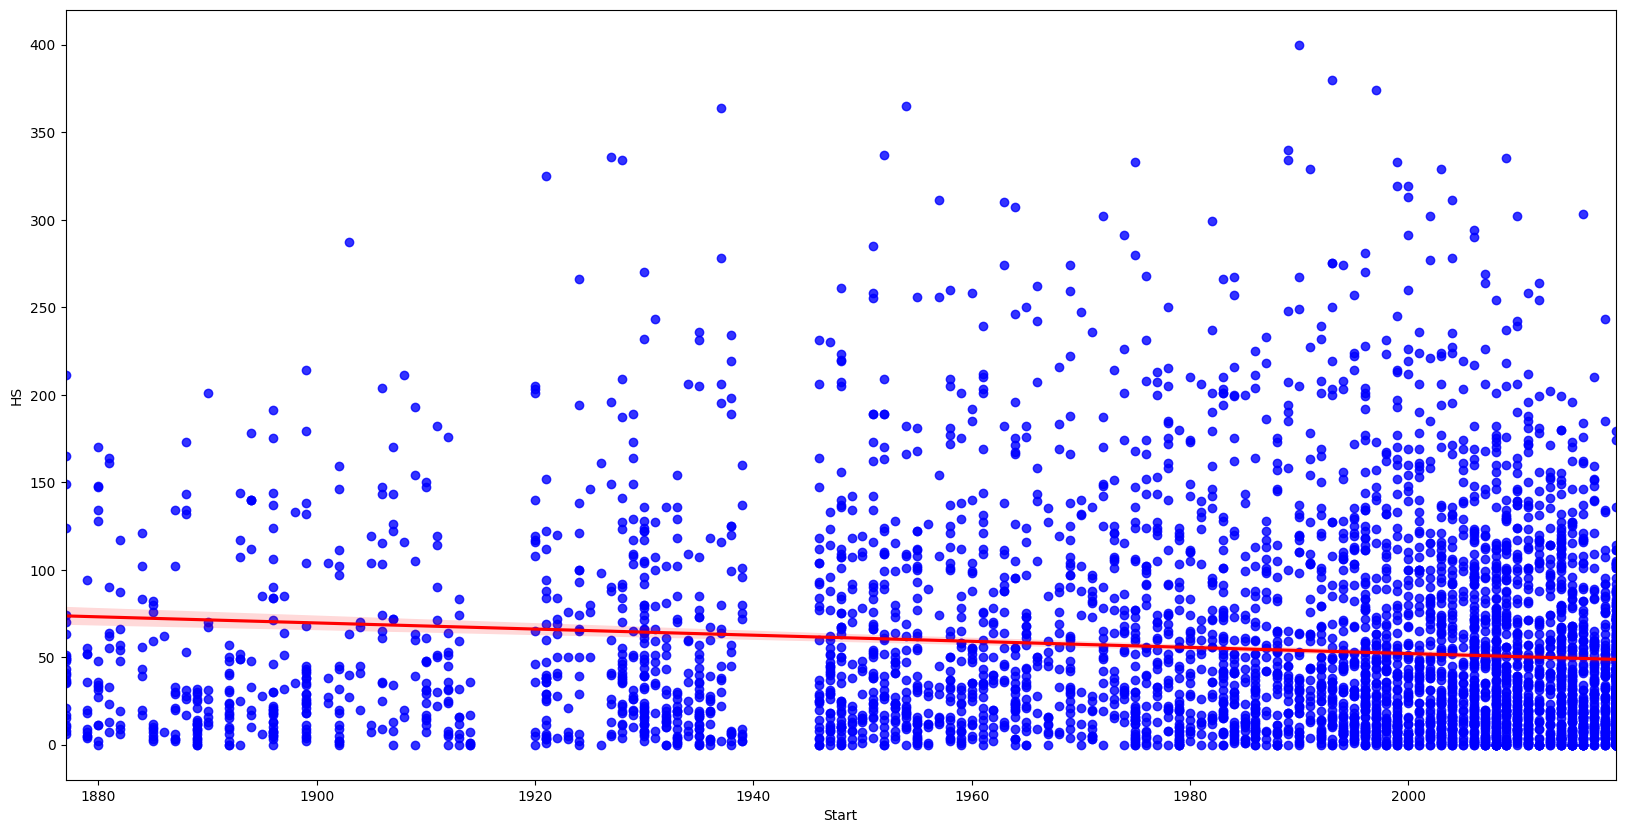

In [47]:
# plot regression plot
plt.figure(figsize=(20, 10))

var_y = 'HS'
# var_x= 'Years_Played'

# var_x = 'Mat'
var_x = 'Start'

# Define colors for the line and scatter points
line_color = 'red'
scatter_color = 'blue'
sns.regplot(x=var_x, 
            y=var_y, 
            data=cricket, 
            color=scatter_color,
            line_kws={"color": line_color})
plt.show()

Graphically we see that there is a decreasing trend although in some case the Highest Score created by players has increased in time.

We employ regression analysis by OLS to check if the trend is statistically significant.

Null hypothesis ($H_0$) in regression states no relationship between independent and dependent variables.<br>
The alternative hypothesis ($H_A$) suggests a significant association between at least one independent variable and the dependent variable.

In [48]:
# Is this statistically significant?
model0 = smf.ols(
    formula = "Q(var_y) ~ Q(var_x)",
    data=cricket).fit()
model0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Q(var_y)   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     59.63
Date:                Wed, 06 Dec 2023   Prob (F-statistic):           1.38e-14
Time:                        15:12:20   Log-Likelihood:                -27602.
No. Observations:                5021   AIC:                         5.521e+04
Df Residuals:                    5019   BIC:                         5.522e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    401.8633     44.973      8.936      0.000     313.697     490.029
Q(var_x)      -0.1749      0.023     -7.722      0.000      -0.219      -0.130
==============================================================================
Omnibus:                     1729.235   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5483.063
Skew:                           1.779   Prob(JB):                         0.00
Kurtosis:                       6.681   Cond. No.                     1.07e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Observations</b><br>
💡 The p-value of the regression is less than alpha (0.05), hence we reject the Null Hypothesis and accept the alternate Hypothesis that the regression is statistically significant.

💡 Why does the High Score shows decreasing trend with time?
- **Match Format Changes**: Alteration in match formats like the introduction of shorter T20 games might influence a decrease in high individual scores as players adapt to different strategies suited for shorter game durations.
- **Decreased Years Played**: A reduction in the number of years played might lead to a drop in the number of high-scoring innings by players as they retire or play fewer matches, impacting the frequency of such records.
- **Change in Batting Trends**: Batsmen might be focusing more on consistent performances rather than attempting risky, high-scoring innings, resulting in fewer instances of exceptional, record-breaking scores.

<style>
    .my-background {
        background-color: #c973c4; /* Specify your desired color */
        padding: 10px;
        color: #000000;
        border-radius: 10px; /* Adjust the radius as needed */
    
        
    }
</style>

<div class="my-background">
    <h1>Clustering</h1>
    <!-- Add your content here -->
</div>

In [49]:
cat_attr = match_table.select_dtypes(include='object'
                                     ).columns.tolist()
num_attr = match_table.select_dtypes(include='number'
                                     ).columns.tolist()

pre_pr = ColumnTransformer([
    ('scale', StandardScaler(), num_attr),
    ('onehot', OneHotEncoder(sparse=False), cat_attr)
])

dt = pre_pr.fit_transform(match_table)
dt.shape

(5021, 13)

In [50]:
pca = PCA(n_components=5)
df = pca.fit_transform(dt)
df.shape

(5021, 5)

For n_clusters = 3 The average silhouette_score is : 0.7658920034094255
For n_clusters = 4 The average silhouette_score is : 0.6124250922087484
For n_clusters = 5 The average silhouette_score is : 0.5591807953475005


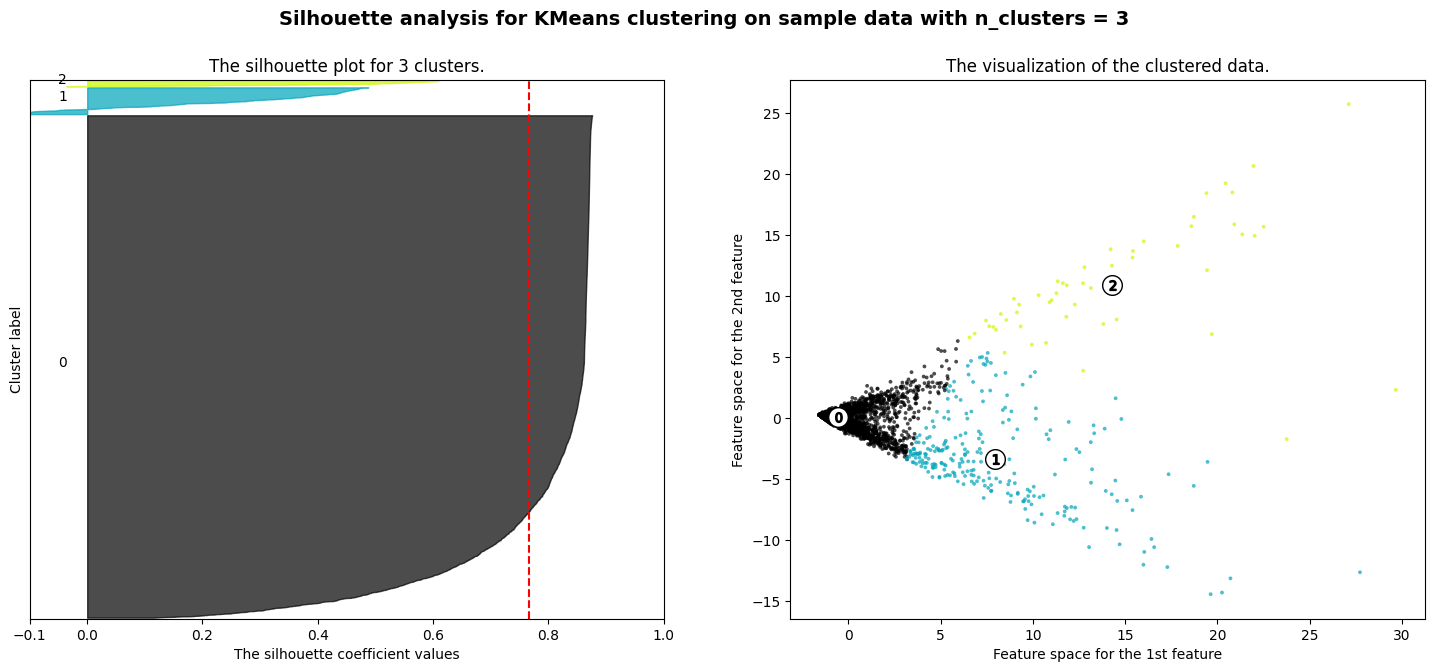

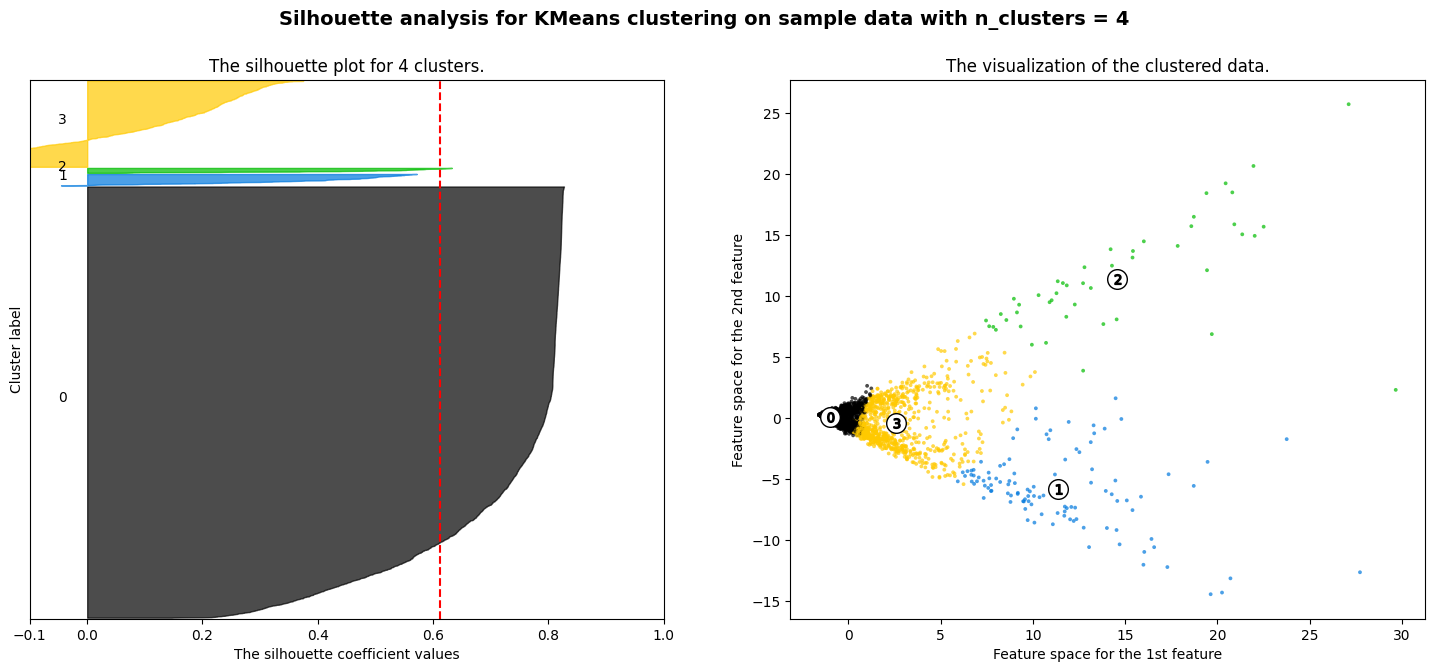

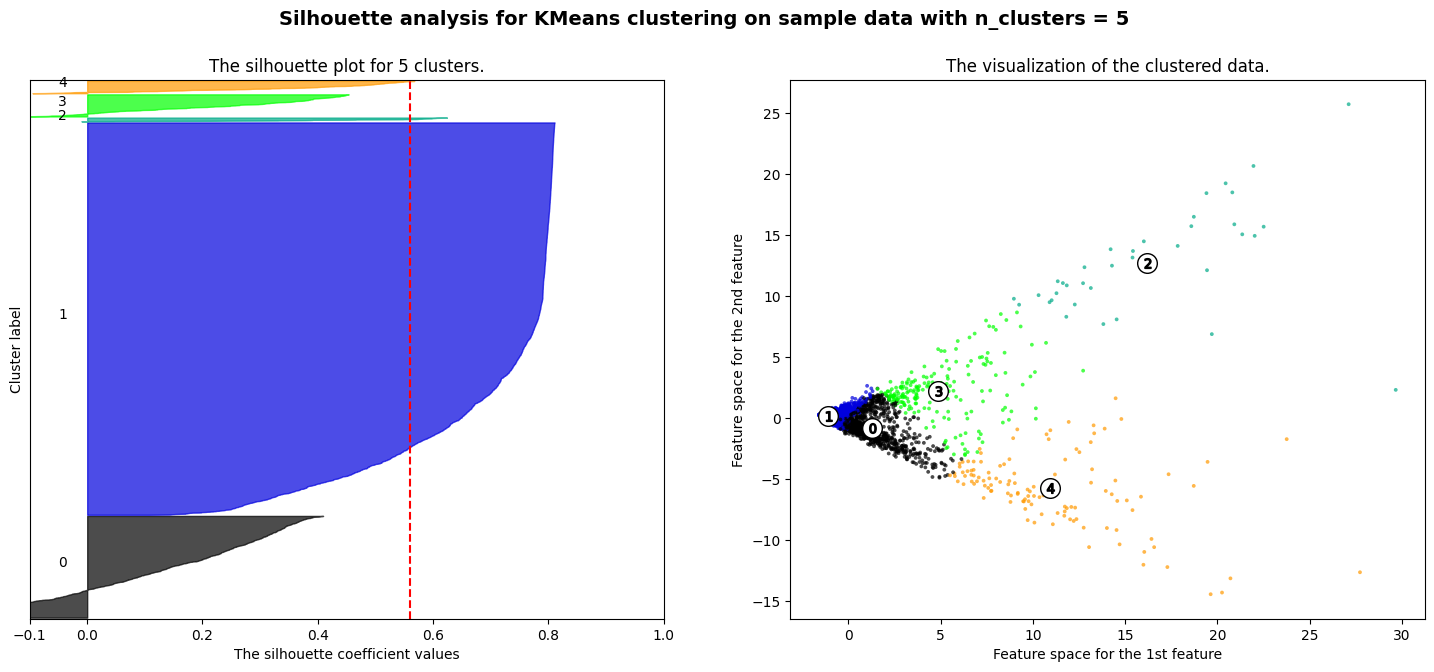

In [51]:
# Set the range of cluster numbers to evaluate
range_n_clusters = [3, 4, 5]


pipe1 = Pipeline([
    ('kmeans', KMeans(n_clusters=3, init='k-means++', 
                      random_state=42))
])

# For each number of clusters, create and plot a silhouette plot
for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])

    # Set the number of clusters in the KMeans model
    pipe1.named_steps.kmeans.set_params(n_clusters=n_clusters, 
                                        random_state=42)

    # Fit the data and obtain cluster labels
    cluster_labels = pipe1.fit_predict(df)

    # Calculate the silhouette score
    silhouette_avg = silhouette_score(df, cluster_labels)
    print("For n_clusters =", n_clusters,
            "The average silhouette_score is :", silhouette_avg)

    # The silhouette plot displays the silhouette scores for each sample
    # and visualizes how they are clustered
    sample_silhouette_values = silhouette_samples(df, 
                                                  cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels 
                                                                 == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, 
                          edgecolor=color, 
                          alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for the next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for {} clusters."
                  .format(n_clusters))
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df[:, 0], 
                df[:, 1], 
                marker='.', 
                s=30, 
                lw=0, 
                alpha=0.7,
                c=colors,
                edgecolor='k')

    # Labeling the clusters
    centers = pipe1.named_steps.kmeans.cluster_centers_
    ax2.scatter(centers[:, 0], 
                centers[:, 1,], 
                marker='o',
                c="white", 
                alpha=1, 
                s=200, 
                edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], 
                    c[1], 
                    marker='$%d$' % i, 
                    alpha=1,
                    s=50, 
                    edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                    "with n_clusters = %d" % n_clusters),
                    fontsize=14, 
                    fontweight='bold')
    plt.savefig('silhouette%02d.pdf' % n_clusters)
plt.show()


According to the Silhouette plot, we can see that forming 3 clusters gives better results.

<Figure size 1000x800 with 0 Axes>

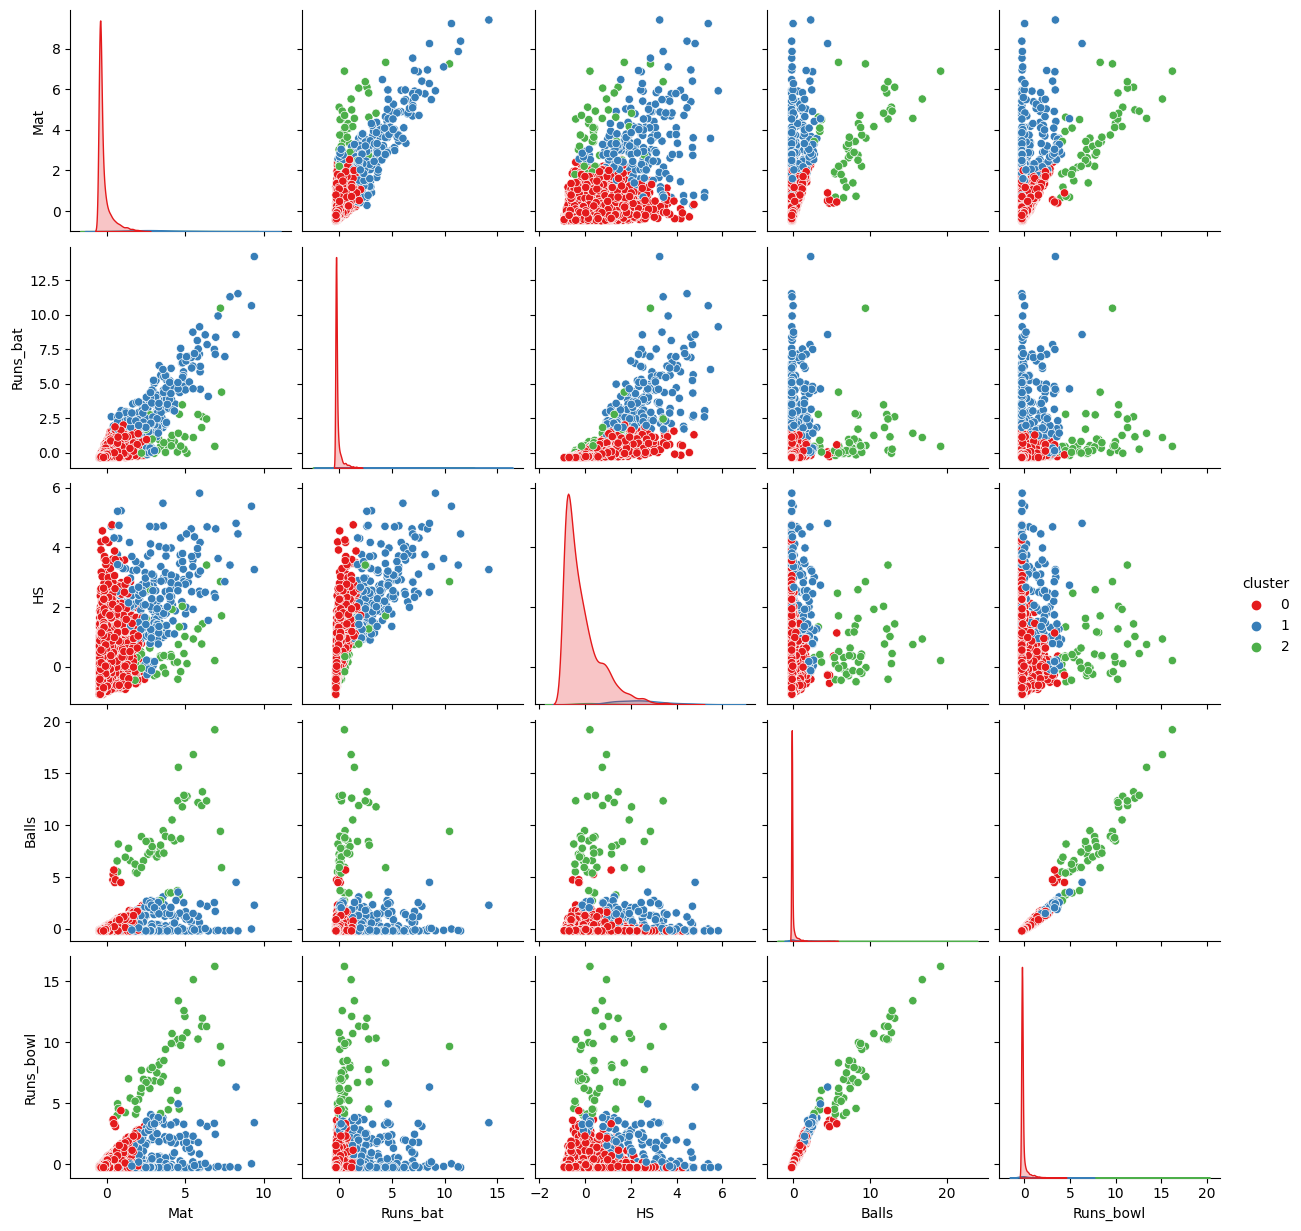

In [52]:
# standardize the data
scaler = StandardScaler()
cricket_scaled = scaler.fit_transform(match_table)

# create a dataframe
cricket_scaled_df = pd.DataFrame(cricket_scaled, 
                                 columns=match_table.columns)

# create KMeans object
kmeans = KMeans(n_clusters=3, random_state=42)

# fit kmeans object to data
kmeans.fit(cricket_scaled_df)

# print location of clusters learned by kmeans object
# print(kmeans.cluster_centers_)
# print(kmeans.labels_)
# print(kmeans.inertia_)
# print(kmeans.n_iter_)

# save new cluster labels
cricket_scaled_df['cluster'] = kmeans.labels_

# plot scatter of clusters
plt.figure(figsize=(10, 8))
# sns.scatterplot(x='HS', y='Wkts', hue='cluster', data=cricket_scaled_df, palette='Set1')
sns.pairplot(cricket_scaled_df[['Mat', 'Runs_bat', 'HS', 'Balls', 'Runs_bowl', 'cluster'
                                ]], hue='cluster', palette='Set1')
plt.show()


<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Observations</b><br>
💡 We plotted 3 cluster output against various variables in our dataset <br>
💡 We can see a good distinction for `Runs_bat` v/s `Balls` and can identify that the players are clustered as **Good Batsman**, **Good Bowler** and **intermediate players**.

<style>
    .my-background {
        background-color: #c973c4; /* Specify your desired color */
        padding: 10px;
        color: #000000;
        border-radius: 10px; /* Adjust the radius as needed */
    
        
    }
</style>

<div class="my-background">
    <h1>Player-of-the-Match Prediction</h1>
    <!-- Add your content here -->
</div>

<style>
    .my-background {
        background-color: #bfc211; /* Specify your desired color */
        padding: 10px;
        color: #000000;
        border-radius: 10px; /* Adjust the radius as needed */
    
        
    }
</style>

<div class="my-background">
    <h2>Secondary Data</h2>
    <!-- Add your content here -->
</div>

The **Player of the Match** in cricket refers to an individual from either team who has delivered an outstanding performance during a particular match. This player is recognized for their exceptional contribution to the game, whether it's through batting, bowling, fielding, or an all-round performance. The Player of the Match is selected based on their impact in influencing the game's outcome positively.<br>

https://www.espncricinfo.com/records/most-player-of-the-match-awards-283470 data contains record of 83 top cricket players and gives the count of Player of matches awards won by them.

In [53]:
# extract data from a webpage
url = "https://www.espncricinfo.com/records/most-player-of-the-match-awards-283470"
awards = pd.read_html(url)[0]
awards

Player       Span   Mat  Awards  Tests  ODIs  T20Is
0            SR Tendulkar (IND)  1989-2013   664      76     14    62      0
1                 V Kohli (IND)  2008-2023   518      66     10    41     15
2       ST Jayasuriya (Asia/SL)  1989-2011   586      58      4    48      6
3        JH Kallis (Afr/ICC/SA)  1995-2014   519      57     23    32      2
4   KC Sangakkara (Asia/ICC/SL)  2000-2015   594      50     16    31      3
..                          ...        ...   ...     ...    ...   ...    ...
81             GJ Maxwell (AUS)  2012-2023   245      20      0    12      8
82          Mohammad Nabi (AFG)  2009-2023   268      20      0     6     14
83                 MM Ali (ENG)  2014-2023   284      20      6     5      9
84                  B Lee (AUS)  1999-2012   322      20      4    15      1
85        Mushfiqur Rahim (BAN)  2005-2023  455*      20      6    10      4

[86 rows x 7 columns]

In [54]:
# take the middle part of Player column
awards['Player_Title'] = awards['Player'].str.split('('
                                                    ).str[0].str.split(' ').str[-2]

# if acronym is in the Player column, make Team column equal to the corresponding country
awards['Team'] = awards['Player'].str.split('('
                                            ).str[1].str.split(')').str[0]

test_to_remove = ['Asia', 'Afr', 'ICC', '/', 'XI', 'World']
for i in test_to_remove:
    awards['Team'] = awards['Team'].str.replace(i, '')

for i in range(len(awards)):
    if awards['Team'][i] in team_acr['Acronym'].values:
        awards['Team'][i] = team_acr[team_acr['Acronym'
                                              ] == awards['Team'][i]]['Country'].values[0]
    else:
        awards['Team'][i] = 'Other'

awards[awards['Player'] == 'EJG Morgan (ENG/IRE)'].Team = 'England'

awards['key'] = awards['Player_Title'] + '_' + awards['Team']

In [55]:
cricket['key'] = cricket['Player_LN'] + '_' + cricket['Team']
merge_right = awards[['Awards', 'key']]

# merge cricket and awards on key
cricket_awards = pd.merge(cricket, 
                          merge_right, 
                          on='key', 
                          how='left')

In [56]:
# take awards NA as new_df
no_award = cricket_awards[cricket_awards['Awards'
                                         ].isna()]
no_award = no_award.drop_duplicates(subset=['Player_LN', 'Team'])
no_award = no_award.sample(200, random_state=100)
no_award['Awards'].fillna(0, inplace=True)

In [57]:
# dropna in Awards column
cricket_awards.dropna(subset=['Awards'], 
                      inplace=True)

# take only that Player_LN_Team combination which has highest Years_Played
cricket_awards = cricket_awards.sort_values('Years_Played', 
                                            ascending=False
                                            ).drop_duplicates(subset=['Player_LN', 'Team'])

In [58]:
# concat no_award and cricket_awards
plofmat = pd.concat([no_award, cricket_awards], axis=0)
plofmat.sample(5)

Player_FN  Player_LN        Team  Mark                        Player  \
2915        MEK     Hussey   Australia     1        MEK Hussey (Australia)   
3246  Mushfiqur      Rahim  Bangladesh     1  Mushfiqur Rahim (Bangladesh)   
1707         GP      Swann     England     1            GP Swann (England)   
1098         DE  Bollinger   Australia     1      DE Bollinger (Australia)   
3059         MS      Dhoni       India     1              MS Dhoni (India)   

      Start   End    Mat  Inns_bat     NO  Runs_bat     HS   100     50     0  \
2915   2004  2013  302.0     324.0   71.0   12398.0  195.0  22.0   72.0  16.0   
3246   2005  2019  369.0     407.0   56.0   11575.0  219.0  13.0   63.0  26.0   
1707   2000  2013  178.0     140.0   37.0    1974.0   85.0   0.0    5.0  10.0   
1098   2009  2014   60.0      24.0   11.0     105.0   30.0   0.0    0.0   4.0   
3059   2004  2019  538.0     526.0  142.0   17266.0  224.0  16.0  108.0  21.0   

         4s    6s  Inns_bowl    Balls  Runs_bowl   Wkts  Years_Played  \
2915   58.0  25.0       14.0    246.0      240.0    2.0            10   
3246  110.0  31.0        0.0      0.0        0.0    0.0            15   
1707    9.0   1.0      223.0  19968.0    11389.0  410.0            14   
1098    0.0   0.0       48.0   2152.0     1731.0   71.0             6   
3059  116.0  52.0        2.0     36.0       31.0    1.0            16   

                      key  Awards  
2915     Hussey_Australia    21.0  
3246     Rahim_Bangladesh    20.0  
1707        Swann_England     0.0  
1098  Bollinger_Australia     0.0  
3059          Dhoni_India    23.0

<style>
    .my-background {
        background-color: #c973c4; /* Specify your desired color */
        padding: 10px;
        color: #000000;
        border-radius: 10px; /* Adjust the radius as needed */
    
        
    }
</style>

<div class="my-background">
    <h1>Modelling</h1>
    <!-- Add your content here -->
</div>

In [59]:
feature_list = ['Mat', 'Inns_bat', 'NO', 'Runs_bat', 'HS',
                '100', '50', '0', 'Inns_bowl', 'Balls', 
                'Runs_bowl', 'Wkts', 'Years_Played']

In [60]:
X = plofmat[feature_list]
y = plofmat['Awards']

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

<style>
    .my-background {
        background-color: #c973c4; /* Specify your desired color */
        padding: 10px;
        color: #000000;
        border-radius: 10px; /* Adjust the radius as needed */
    
        
    }
</style>

<div class="my-background">
    <h3>Random Forest</h3>
    <!-- Add your content here -->
</div>

In [61]:
# create a RandomForestRegressor object
rf = RandomForestRegressor(random_state=42)

# calculate accuracy score
rf.fit(X_train, y_train)
print('Accuracy: ', rf.score(X_test, y_test))

Accuracy:  0.8966731337065584


<style>
    .my-background {
        background-color: #c973c4; /* Specify your desired color */
        padding: 10px;
        color: #000000;
        border-radius: 10px; /* Adjust the radius as needed */
    
        
    }
</style>

<div class="my-background">
    <h3>Gradient Boost Decision Tree</h3>
    <!-- Add your content here -->
</div>

In [62]:
# create a GradientBoostingRegressor object
gb = GradientBoostingRegressor(random_state=42)

# calculate accuracy score
gb.fit(X_train, y_train)
print('Accuracy: ', gb.score(X_test, y_test))

Accuracy:  0.9177660054876727


We see that Gradient Boosting Decision Tree provides a better accuracy for Player-of-the-Match prediction.<br>
Thus we use this model to understand which features play an important role in determining the Player-of-the-Match

<style>
    .my-background {
        background-color: #c973c4; /* Specify your desired color */
        padding: 10px;
        color: #000000;
        border-radius: 10px; /* Adjust the radius as needed */
    
        
    }
</style>

<div class="my-background">
    <h3>Feature Importance</h3>
    <!-- Add your content here -->
</div>

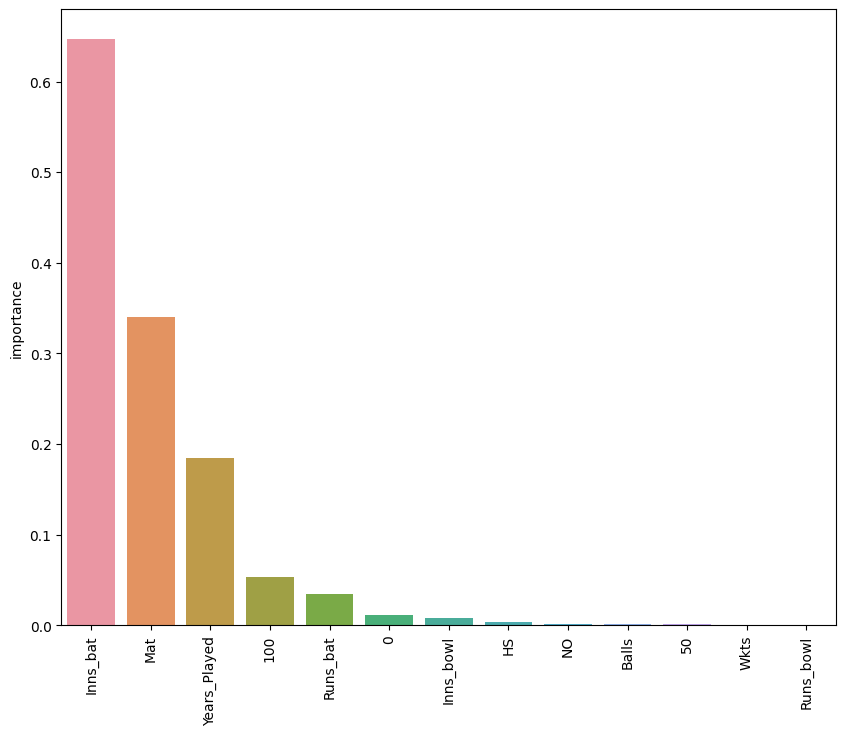

In [63]:
# compute permutation feature importance
result = permutation_importance(gb, X, y, n_repeats=10, random_state=42, n_jobs=-1)

# get feature importances
feature_importances = pd.DataFrame(result.importances_mean,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

# plot feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances.index, y=feature_importances['importance'])
plt.xticks(rotation=90)
plt.show()

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Observations</b><br>
💡 The number of innings batted is the most important feature, highlighting the consistency of a player in contributing to the team's score.<br>
💡 The number of matches played is also significant, suggesting that the overall performance is influenced by the player's participation in matches.<br>
💡 The total number of years a cricketer played significantly adds to the overall player contribution.<br>
💡 Number of centuries a player scores is a consideration taken into the account.<br>
💡 The total runs scored by a player in batting is important as well, reinforcing the significance of overall batting performance.<br>


<style>
    .my-background {
        background-color: #c973c4; /* Specify your desired color */
        padding: 10px;
        color: #000000;
        border-radius: 10px; /* Adjust the radius as needed */
    
        
    }
</style>

<div class="my-background">
    <h1>SHAP analysis</h1>
    <!-- Add your content here -->
</div>

**SHAP (SHapley Additive exPlanations)** values elucidate the influence of individual features on machine learning model predictions. They provide both local and global interpretability by quantifying the impact of each feature on specific predictions and across the dataset.<br>
SHAP values interpret the impact of having a certain value for a given feature in comparison to the prediction we'd make if that feature took some baseline value.

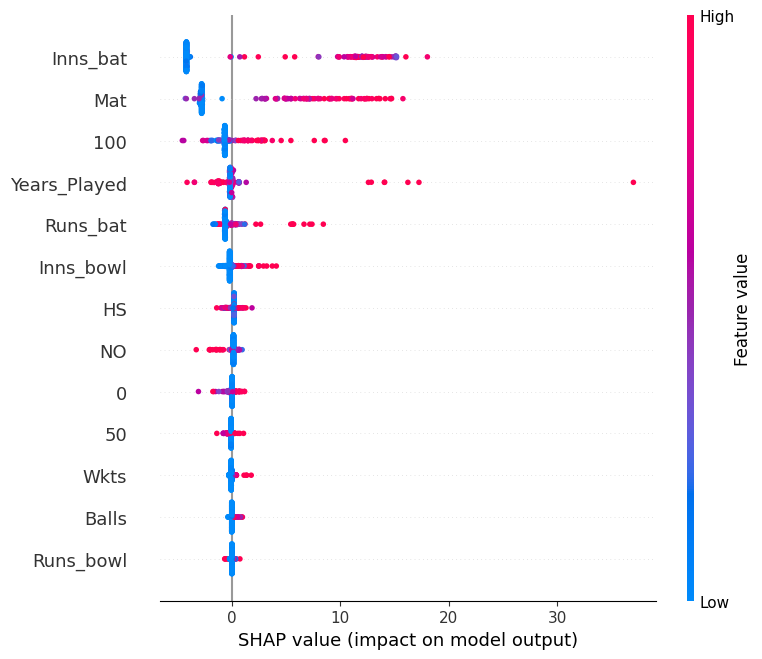

In [64]:
# create object that can calculate shap values
explainer = shap.TreeExplainer(gb)

# calculate shap values
shap_values = explainer.shap_values(X)

# plot shap values
shap.summary_plot(shap_values, X)

Here we can see that, the larger the number of `Inns_bat` and `Mat`, the higher is the change of winning Player-of-the-Match award. Other variables like `100` and `Runs_bat` also play an important role.

Exploring the SHAP on some instances:

In [69]:
shap.initjs()
shap.force_plot(explainer.expected_value, 
                shap_values[210,:], 
                X.iloc[211,:])

In [70]:
plofmat[210:211][['Player', 'Awards']]

Player  Awards
4331  SR Waugh (Australia)    26.0

It shows that while `Inns_bat` and `Mat` played a positive role in scoring the awards, `NO` and `Years_Played` contributed negatively towards it.

In [71]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[20,:], X.iloc[20,:])

In [68]:
plofmat[20:21][['Player', 'Awards']]

Player  Awards
233  AJ Pithey (South Africa)     0.0

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Observations</b><br>
💡 For SR Waugh (Australia)	, SHAP explains how it predicted 26.78 as Player-of-the-Match score where the actual score was 26 <br>
💡 For AJ Pithey (South Africa), SHAP explains how it predicted 0 as Player-of-the-Match score and the actual score too was 0